<a href="https://colab.research.google.com/github/DrHeogg/vna-verification-analysis/blob/main/%D0%9F%D0%9F%D0%9F2(2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Импортируем библиотечки

requests для запросов, BeautifulSoup для парсинга

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 2. Запросы и парсинг

Ссылка формируется как: https://fgis.gost.ru/fundmetrology/cm/results? +
- page= (номер страницы, по которому будет идти итерация)
- &activeYear= (значение года, за который нужна статистика, можно указать значение "Все")



Дальнейший парсинг происходил в pycharm

# 3. Работа с данными


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

df_path = "/content/drive/MyDrive/combined_output.csv".replace('\t', '')
df = pd.read_csv(df_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   regNumber        136 non-null    object 
 1   mitypeNumber     16459 non-null  object 
 2   mitypeType       11805 non-null  object 
 3   mitypeTitle      16459 non-null  object 
 4   manufactureNum   16374 non-null  object 
 5   modification     15238 non-null  object 
 6   manufactureYear  136 non-null    float64
 7   rankCode         136 non-null    object 
 8   rankTitle        136 non-null    object 
 9   schemaTitle      136 non-null    object 
 10  organization     16459 non-null  object 
 11  signCipher       16459 non-null  object 
 12  miOwner          10090 non-null  object 
 13  vrfDate          16459 non-null  object 
 14  validDate        16459 non-null  object 
 15  docTitle         16457 non-null  object 
 16  vriType          9728 non-null   float64
 17  applicable  

In [ ]:
df

,regNumber,mitypeNumber,mitypeType,mitypeTitle,manufactureNum,modification,manufactureYear,rankCode,rankTitle,schemaTitle,...,miOwner,vrfDate,validDate,docTitle,vriType,applicable,certNum,signPass,signMi,noticeNum
0,NaN,69453-17,"MS46122B, MS46322B, MS46522B, MS46524B",Анализаторы цепей векторные,1806303,MS46122B,NaN,NaN,NaN,NaN,...,"АО ""Котлин-Новатор""",09.07.2024,08.07.2025,MS46000B/МП-2017 «ГСИ. Анализаторы цепей векто...,2.0,1,С-ГИФ/09-07-2024/353205710,False,False,NaN
1,NaN,63655-16,"MS46122A, MS46322A",Анализаторы цепей векторные,1636303,MS46122A,NaN,NaN,NaN,NaN,...,"АО ""Котлин-Новатор""",09.07.2024,08.07.2025,РТ-МП-3029-441-2016 «Анализаторы параметров ра...,2.0,1,С-ГИФ/09-07-2024/353204719,False,False,NaN
2,NaN,47185-11,Р4М-18,Анализаторы цепей векторные,1102160007,Нет модификации,NaN,NaN,NaN,NaN,...,Юридическое лицо,05.07.2024,04.07.2025,ЖНКЮ.468166.006 Д3,2.0,1,С-ВЗ/05-07-2024/352385075,False,False,NaN
3,NaN,65960-16,"C1205, C1207, С1209, С1214, С1220, С1409, С142...",Анализаторы цепей векторные,23210030,С1409,NaN,NaN,NaN,NaN,...,Владелец,05.07.2024,04.07.2025,РТ-МП-3531-441-2016 (РНДМ.468166.002 МП),2.0,1,С-МА/05-07-2024/352426095,False,False,NaN
4,NaN,65960-16,"C1205, C1207, С1209, С1214, С1220, С1409, С142...",Анализаторы цепей векторные,23210028,С1409,NaN,NaN,NaN,NaN,...,Владелец,05.07.2024,04.07.2025,РТ-МП-3531-441-2016 (РНДМ.468166.002 МП),2.0,1,С-МА/05-07-2024/352426085,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16454,NaN,нет данных,NaN,Измерители комплексных коэффициентов передачи ...,09125007,нет данных,NaN,NaN,NaN,NaN,...,NaN,19.01.2010,19.01.2010,нет данных,NaN,1,1/160-007-10,NaN,NaN,NaN
16455,NaN,нет данных,NaN,Измерители комплексных коэффициентов передачи ...,09125006,нет данных,NaN,NaN,NaN,NaN,...,NaN,19.01.2010,19.01.2010,нет данных,NaN,1,1/160-006-10,NaN,NaN,NaN
16456,NaN,нет данных,NaN,Измерители комплексных коэффициентов передачи ...,09125004,нет данных,NaN,NaN,NaN,NaN,...,NaN,19.01.2010,19.01.2010,нет данных,NaN,1,1/160-004-10,NaN,NaN,NaN
16457,NaN,нет данных,NaN,Измерители комплексных коэффициентов передачи ...,09125003,нет данных,NaN,NaN,NaN,NaN,...,NaN,19.01.2010,19.01.2010,нет данных,NaN,1,1/160-003-10,NaN,NaN,NaN


In [ ]:
df.describe(include = 'object')

,regNumber,mitypeNumber,mitypeType,mitypeTitle,manufactureNum,modification,rankCode,rankTitle,schemaTitle,organization,signCipher,miOwner,vrfDate,validDate,docTitle,certNum,signPass,signMi,noticeNum
count,136,16459,11805,16459,16374,15238,136,136,136,16459,16459,10090,16459,16459,16457,16141,10216,10216,306
unique,90,79,75,40,5930,721,6,6,34,216,121,1001,2956,3182,1298,14679,2,2,299
top,56388.14.2Р.00179420,53568-13,"N5221A, N5222A, N5224A, N5225A, N5227A, N5231A...",Анализаторы цепей векторные,б/н,нет данных,2Р,Эталон 2-го разряда,"ГПС для СИ волнового сопротивления, ККО и ККП ...","ФЕДЕРАЛЬНОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ""ГОСУДАРСТВЕН...",МА,Юридическое лицо,24.11.2013,25.11.2014,нет данных,нет данных,False,False,нет данных
freq,4,1290,890,7205,78,1492,80,80,24,2260,2995,1638,73,71,2536,1232,9544,8822,4


# Предобработка (новые DF, новые столбцы, top/val companies)

Создаем колонку - производитель (Manufacturer)

In [ ]:
# Словарь соответствия mitypeType - manufacturer
manufacturer_dict ={
'MS46122B, MS46322B, MS46522B, MS46524B': 'Anritsu',
'MS46122A, MS46322A': 'Anritsu',
'Р4М-18': 'Микран',
'C1205, C1207, С1209, С1214, С1220, С1409, С1420, С2209, С2409, С2220, С2420, С4209, С4409, С4220, С4420': 'Планар',
'ZNC3, ZNB4, ZNB8': 'Rohde & Schwarz',
'Р4213, Р4226': 'Микран',
'ZVA 8, ZVA 24, ZVA 40': 'Rohde & Schwarz',
'N5221A, N5222A, N5224A, N5225A, N5227A, N5231A, N5232A, N5234A, N5235A, N5239A, N5241А, N5242А, N5244A, N5245А, N5247A': 'keysight, Agilent',
'E5061B, E5072A': 'keysight, Agilent',
'R&S ZVB 4/8/14/20': 'Rohde & Schwarz',
'R&S ZNC3, ZNB4, ZNB8': 'Rohde & Schwarz',
'E8361A/C, E8362B/C, E8363B/C, E8364B/C': 'keysight, Agilent',
'Agilent Е5071С': 'keysight, Agilent',
'Agilent E5071C с опциями 2К5, 4К5, 260, 460, 465, 2D5, 4D5': 'keysight, Agilent',
'ZVL13': 'Rohde & Schwarz',
'E5071C': 'keysight, Agilent',
'Е5063А, E5071C': 'keysight, Agilent',
'АКИП-6602': 'АКИП',
'Agilent Е5071С': 'keysight, Agilent',
'ZVL3, ZVL6': 'Rohde & Schwarz',
'АКИП-6604': 'АКИП',
'S50x4x': 'Планар',
'N5249A, N5249B': 'keysight, Agilent',
'N5242A': 'keysight, Agilent',
'E5080B': 'keysight, Agilent',
'ZVL3-75': 'Rohde & Schwarz',
'S50180': 'Планар',
'S50x5': 'Планар',
'N5230A/C': 'keysight, Agilent',
'N5221A, N5222A, N5224A, N5225A, N5227A, N5231A, N5232A, N5234A, N5235A, N5239A, N5241А, N5242А, N5244A, N5245А, N5247A, N5221B, N5222B, N5224B, N5225B, N5227B, N5231B, N5232B, N5234B, N5235B, N5239B, N5241B, N5242B, N5244B, N5245B, N5247B': 'keysight, Agilent',
'ZNB20, ZNB40': 'Rohde & Schwarz',
'ZNB40 мод. 82 и 84': 'Rohde & Schwarz',
'ZNA26, ZNA43': 'Rohde & Schwarz',
'E5061B': 'keysight, Agilent',
'ZND': 'Rohde & Schwarz',
'P9370А, P9371А, P9372А, P9373А, P9374А, P9375А, P5000A, P5020A, P5001A, P5021A, P5002A, P5022A, P5003A, P5023A, P5004A, P5024A, P5005A, P5025A, P5006A, P5026A, P5007A, P5027A, P5008A, P5028A': 'keysight, Agilent',
'серий 3672"," 3672-S': 'Ceyear',
'E5063A': 'keysight, Agilent',
'ZNLE3, ZNLE6': 'Rohde & Schwarz',
'Е5080А': 'keysight, Agilent',
'R&S ZVB4/8/20': 'Rohde & Schwarz',
'ZNA': 'Rohde & Schwarz',
'XS-VNA-01': 'Xiansheng',
'Р4М-40': 'Микран',
'M9370А, M9371А, M9372А, M9373А, M9374А, M9375А, M9800A, M9801A, M9802A, M9803A, M9804A, M9805A, M9806A, M9807A, M9808A': 'keysight, Agilent',
'ZNLE': 'Rohde & Schwarz',
'ZNL3, ZNL6': 'Rohde & Schwarz',
'ZVA50, ZVA67, ZVA80': 'Rohde & Schwarz',
'М9370А, М9371А, М9372А, М9373А, М9374А, М9375А': 'keysight, Agilent',
'N5241A, N5244A, N5245A': 'keysight, Agilent',
'MS4642B, MS4644B, MS4645B, MS4647B (анализаторы), MN4694С, MN4697С (блоки)': 'Anritsu',
'SN9000': 'Планар',
'AV3672A/B/C/D': 'China Electronics',
'N9923A': 'keysight, Agilent',
'ZNH': 'Rohde & Schwarz',
'MS2024A, MS2026A, MS2034A, MS2036A': 'Anritsu',
'ZVT8, ZVT20': 'Rohde & Schwarz',
'E8362B': 'keysight, Agilent',
'серии 3656': 'Ceyear',
'Advantest R3765CG': 'Advantest',
'Обзор-103': 'Планар',
'"Обзор-304", "Обзор-304/1"': 'Планар',
'ОБЗОР-804, ОБЗОР-804/1, ОБЗОР-808, ОБЗОР-808/1': 'Планар',
'Р4-38': 'Микран',
'Р4-11': 'Микран',
'Р4-37, Р4-37/1 "Рим-4"': 'Микран',
'Р4-36': 'Микран',
'Р4-МВМ-178': 'Микран',
'Р4-23': 'Микран',
'Р4-69': 'Микран',
'Р4-МВМ-118': 'Микран',
'Р4-62, Р4-63': 'Микран'
}
df['Manufacturer'] = df['mitypeType'].map(manufacturer_dict)

Создаем колонку с последней поверкой

In [ ]:
df['vrfDate'] = pd.to_datetime(df['vrfDate'], format='%d.%m.%Y')

last_verification_dates = df.groupby('manufactureNum')['vrfDate'].max().to_dict()
df['LastVerificationDate'] = df['manufactureNum'].map(last_verification_dates)
df['Duration'] = (df['LastVerificationDate'] - df['vrfDate']).dt.days

# **Правки названий компаний**

In [ ]:

def normalize_company_name(name):
  """Нормализует название компании."""
  name = name.strip()
  name = name.lower()
  name = name.replace('(', '')
  name = name.replace(';', '')
  name = name.replace(')', '')
  name = name.replace('”', '')
  name = name.replace('"', '')
  name = name.replace("'", '')
  name = name.replace('«', '')
  name = name.replace('»', '')
  name = name.replace('”', '')
  name = name.replace('“', '')
  name = name.replace(". ", ".")
  name = name.replace(" . ", ".")
  name = name.replace(" .", ".")
  name = name.replace("имени", "им")
  name = name.replace("фгуп 18 цнии мо рф", "18 цнии")
  name = name.replace('цнити техномашвос', 'цнити техномаш вос')
  name = name.replace('цнити техномаш', 'цнити техномаш вос')
  name = name.replace('филиал фгуп рфяцвнииэф нииис им ю е седакова', 'филиал фгуп рфяцвнииэф ниис им ю е седакова')
  name = name.replace('научно-исследовательский институт', 'нии')
  name = name.replace("-", "")
  name = name.replace('госмкб радуга им а я березняка', 'гос мкб радуга им а я березняка')
  name = name.replace("федеральное государственное бюджетное учреждение", "фгбу")
  name = name.replace('федеральное государственное унитарное предприятие', 'фгуп')
  name = name.replace('научно-производственное предприятие', 'нпп')
  name = name.replace('московский авиационный институт', 'маи')
  name = name.replace('федеральное бюджетное учреждение', 'фбу')

  if name in ["фгуп рфяц вниитф им.академ.е.и.забабахина","фгуп рфяцвниитф им.академ.е.и.забабахина"]:
    name = "фгуп рфяц вниитф им.академ.е.и.забабахина"
  if name in ["аовнии градиент","внииградиент","аовнииградиент"]:
    name = "внии градиент"
  if name in ['юр.лицо', 'юридическое лицо',' ','', '-', 'владелец', 'владелец си', 'физическое лицо', 'ао', 'фл','nan', np.nan, None,"заказчик поверки средства измерений"]:
    name = "Неизвестный владелец СИ"
  name = name.replace(".", " ")
  pattern = rpattern = r'\b(пао|ооо|ао|зао|оао|ип|публичное акционерное общество|общество с ограниченной ответственностью|акционерное общество|закрытое акционерное общество|открытое акционерное общество|индивидуальный предприниматель)\b'
  name = re.sub(pattern, '', name).strip()
  name = re.sub(r'\s+', ' ', name)
  name = re.sub(r'\s*инн\s*\d{10,}\s*$', '', name).strip()
  name = re.sub(r'^ао\s*', '', name, flags=re.IGNORECASE).strip()

  return name

df['miOwner'] = df['miOwner'].astype(str).apply(normalize_company_name)
df_filtered = df[pd.to_datetime(df['vrfDate']).dt.year.isin([2021, 2022, 2023])]

# Получаем уникальные miOwners для отфильтрованных данных
unique_miOwners = sorted(pd.unique(df_filtered['miOwner'].astype(str)))
for i in unique_miOwners:
  print(i)

18 цнии
<<внии <<градиент>>
vxiсистемы
Неизвестный владелец СИ
аа инжиниринг
авиаприбор
автоваз
аджитекурал
акметрон
акниипо
актуальные системы безопасности
алмаз
алькоркоммьюникейшин
амитрон электроникс
амтест
ано акниипо
ано проитехносерт
ап восход
апз
аргус эт
аргусспектр
аргусэт
арриватек
арсенал крзпп
аспектриум
астраком
ати
афс
аэк
аэк дизайн
аэроприборвосход
аэрофлот
би питрон
брянский электромеханический завод
бутис
бэмз
везерфорд
взрто
викор
владимирский завод электроприбор
вмз
вмп авитек
внии градиент
внииградиент
вниир
вниирпрогресс
вниирт
вниифтри
волгоградский ортпц
воронежское центральное конструкторское бюро полюс
восточносибирский филиал фгуп вниифтри
восходкрлз
воткинский завод
впк нпо машиностроения
впктехно системс
времяч
вэмз
газпром космические системы
газпром трансгаз санктпетербург
газпром трансгаз сургут
гвоздев евгений юрьевич
гзас им а с попова
гикэл
гкнпц им м в хруничева
глобальные системы
гос мкб вымпел им и и торопова
гос мкб радуга им а я березняка
госмкб

Создаем отдельные DF

In [ ]:
df['vrfDate'] = pd.to_datetime(df['vrfDate'], format='%d.%m.%Y')
df_nodub = df.drop_duplicates(subset='manufactureNum',keep = 'last')
df_2022 = df[pd.to_datetime(df['vrfDate']).dt.year == 2022]
df_2022_nodub = df_nodub[pd.to_datetime(df_nodub['vrfDate']).dt.year == 2022]

# **1. График поверок по годам**

<ipython-input-32-ee73728aca18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodub['vrfDate'] = pd.to_datetime(df_nodub['vrfDate'], format='%d.%m.%Y')


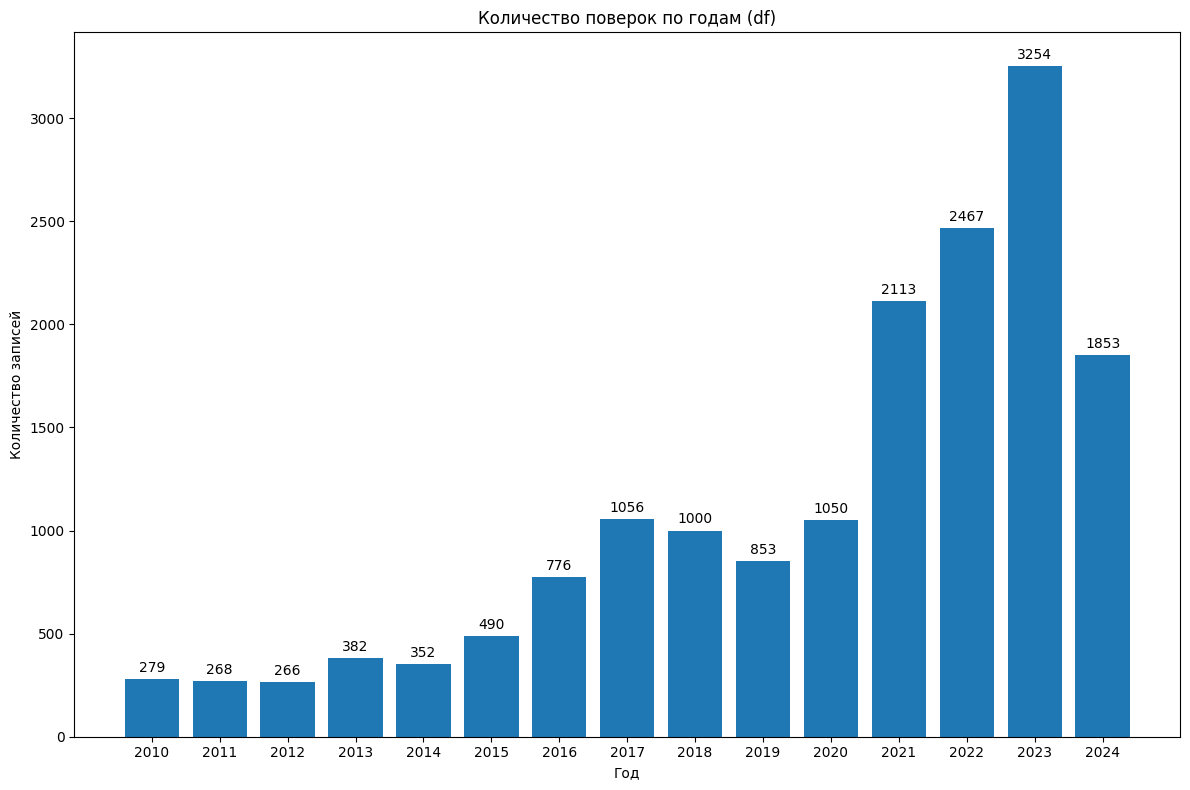

In [ ]:
import matplotlib.pyplot as plt
import re
df['vrfDate'] = pd.to_datetime(df['vrfDate'], format='%d.%m.%Y')
year_counts_df = df['vrfDate'].dt.year.value_counts().sort_index()

# Преобразование дат в df_nodub
df_nodub['vrfDate'] = pd.to_datetime(df_nodub['vrfDate'], format='%d.%m.%Y')
year_counts_df_nodub = df_nodub['vrfDate'].dt.year.value_counts().sort_index()

# Создание subplots (только один график)
fig, ax1 = plt.subplots(figsize=(12, 8))

# Построение первого графика
bars = ax1.bar(year_counts_df.index, year_counts_df.values)
ax1.set_xlabel('Год')
ax1.set_ylabel('Количество записей')
ax1.set_title('Количество поверок по годам (df)')

# Добавление чисел на подписи
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3),
                  textcoords='offset points',
                  ha='center',
                  va='bottom')

plt.xticks(year_counts_df.index)
plt.tight_layout()  # Улучшение расположения графиков
plt.show()

# **Первичные и вторичные поверки по годам**

In [ ]:
value_counts = df_2022_nodub['Manufacturer'].value_counts()
print(value_counts)

Manufacturer
Планар               272
keysight, Agilent    143
Микран                64
Rohde & Schwarz       44
Ceyear                 3
АКИП                   2
Name: count, dtype: int64


In [ ]:
df_2022_nodub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 3908 to 13810
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   regNumber             11 non-null     object        
 1   mitypeNumber          528 non-null    object        
 2   mitypeType            528 non-null    object        
 3   mitypeTitle           528 non-null    object        
 4   manufactureNum        528 non-null    object        
 5   modification          528 non-null    object        
 6   manufactureYear       11 non-null     float64       
 7   rankCode              11 non-null     object        
 8   rankTitle             11 non-null     object        
 9   schemaTitle           11 non-null     object        
 10  organization          528 non-null    object        
 11  signCipher            528 non-null    object        
 12  miOwner               528 non-null    object        
 13  vrfDate             

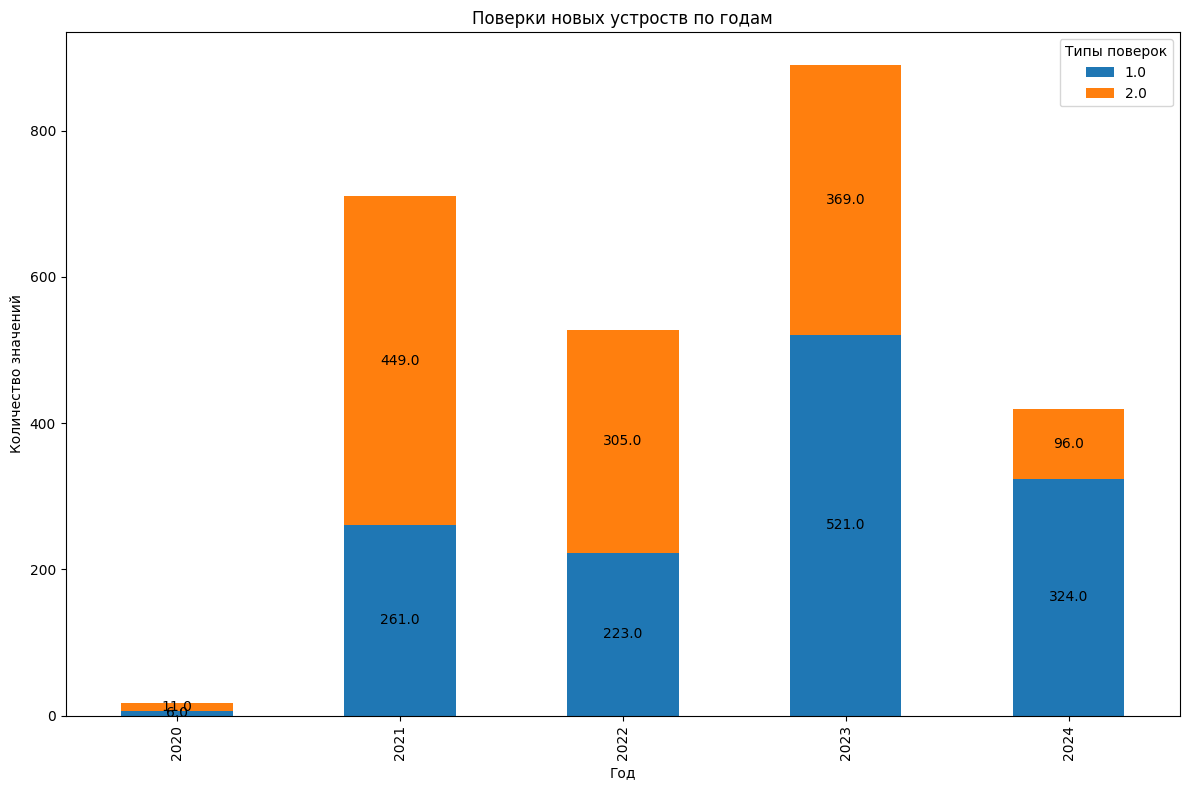

In [ ]:
# график
year_counts_df_nodub = df_nodub.groupby([df_nodub['vrfDate'].dt.year, 'vriType'])['vriType'].count().unstack()

# Создание subplots
fig, ax2 = plt.subplots(figsize=(12, 8))

# Построение второго графика
year_counts_df_nodub.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xlabel('Год')
ax2.set_ylabel('Количество значений')
ax2.set_title('Поверки новых устроств по годам')
ax2.set_xticks(ax2.get_xticks())  # Убираем поворот меток оси x
ax2.legend(title='Типы поверок')

# Добавление подписей к каждой группе на втором графике
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax2.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

plt.tight_layout()  # Улучшение расположения графиков
plt.show()

# **3. Структура вендоров**

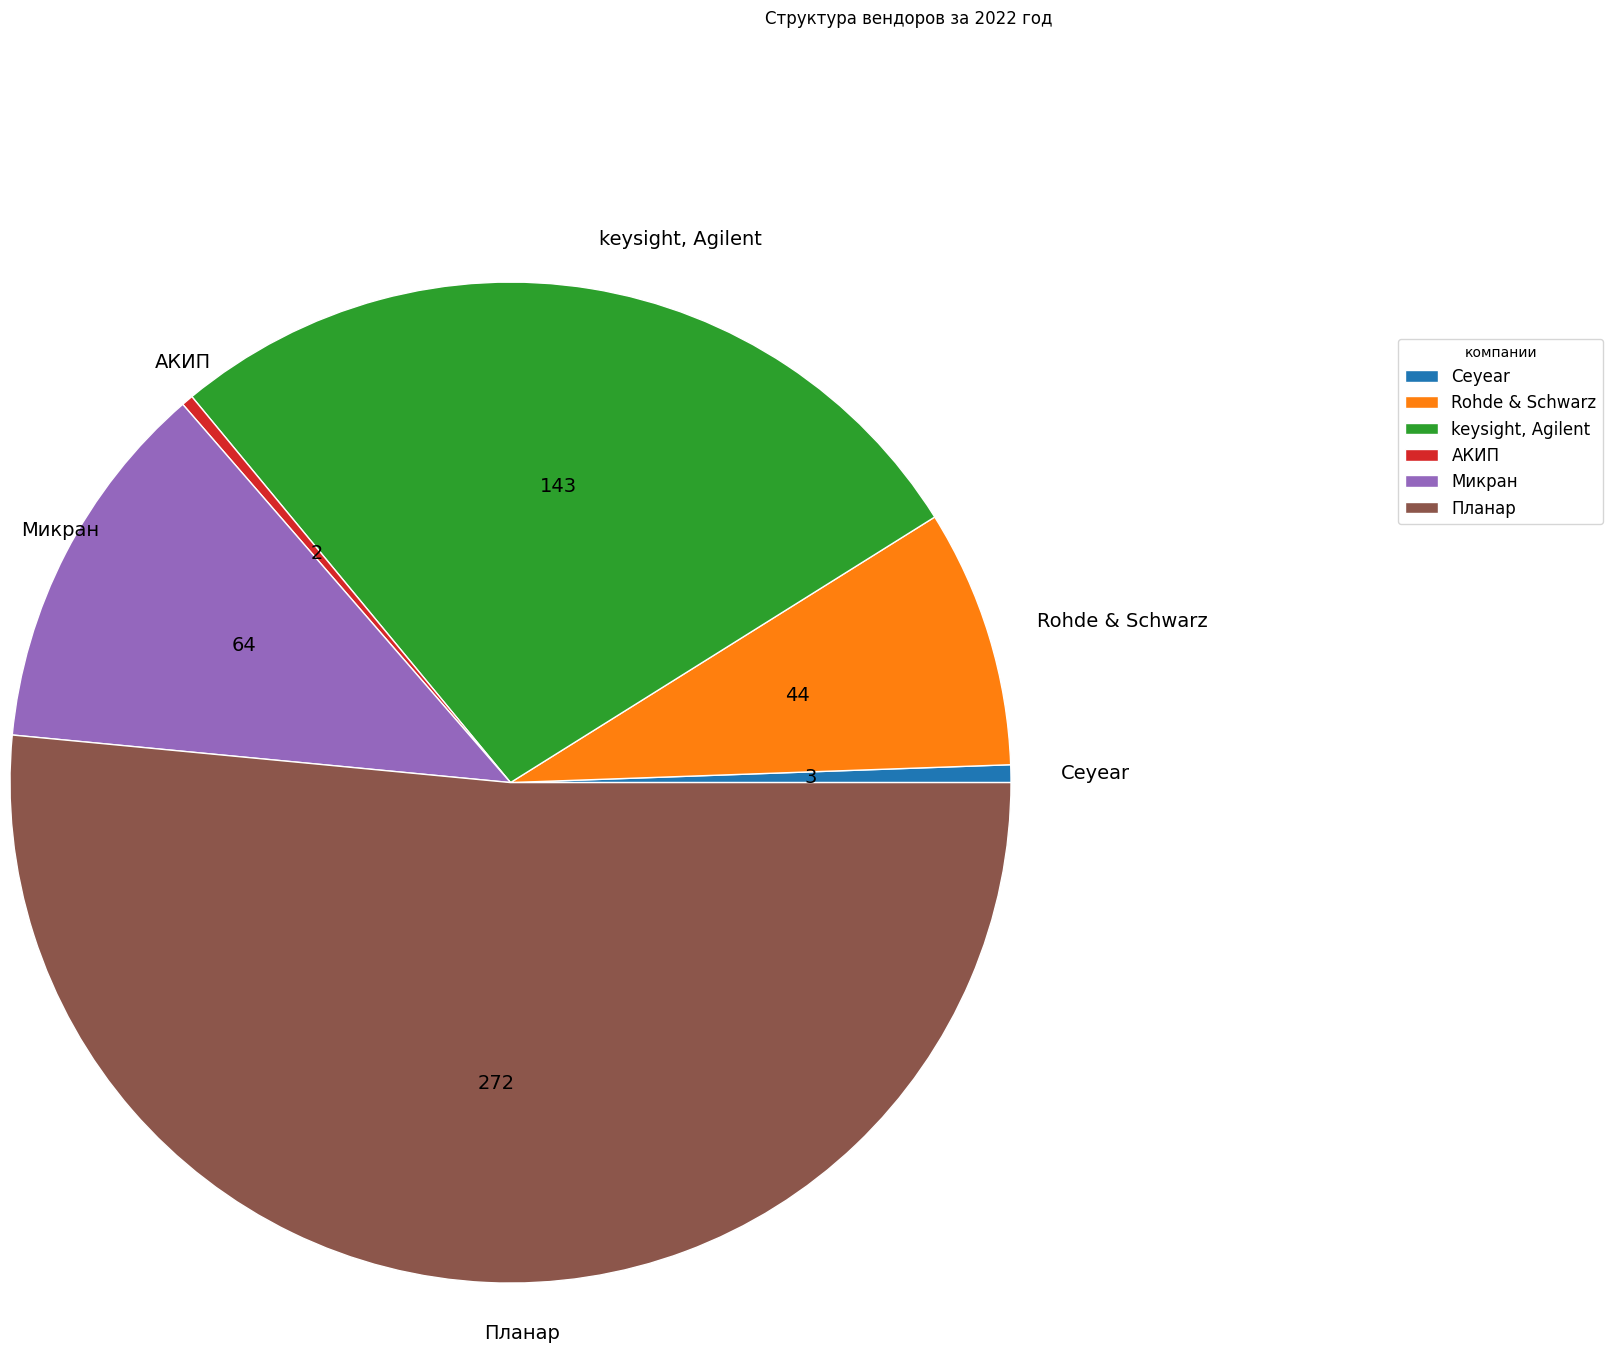

In [ ]:
import numpy as np
from matplotlib import cm

# ... ваш код для загрузки данных ...

vendors = df_2022_nodub.groupby('Manufacturer')['vriType'].apply(lambda x: (x == 1.0).sum()).index.tolist()
grouped_data2 = df_2022_nodub[df_2022_nodub['Manufacturer'].isin(vendors )].groupby(['Manufacturer', 'vriType']).size().unstack(fill_value=0)

# Удаляем компании с 0 первичных проверок
grouped_data2 = grouped_data2[grouped_data2[1.0] != 0]

# Создаем новый столбец с суммой проверок
grouped_data2['Total'] = grouped_data2[1.0] + grouped_data2[2.0]  # <--- Изменение здесь

labels = [ " ".join(label.split()[:5]) for label in grouped_data2.index.get_level_values('Manufacturer').tolist()]

fig, ax = plt.subplots(figsize=(26, 13))
wedges, texts, autotexts = ax.pie(grouped_data2['Total'], radius=10, labels=labels, center=(12, 15),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, autopct=lambda p: '{:.0f}'.format(p * sum(grouped_data2['Total']) / 100),
       textprops={'fontsize': 14}, startangle=0)

ax.set(xlim=(10, 30),
       ylim=(10, 30))

plt.title('Структура вендоров за 2022 год ')
plt.legend(title='компании', loc='lower right', bbox_to_anchor=(1.2, 0.5), prop = {'size' : 12})
plt.show()

# **4. Графики по каждому вендору**

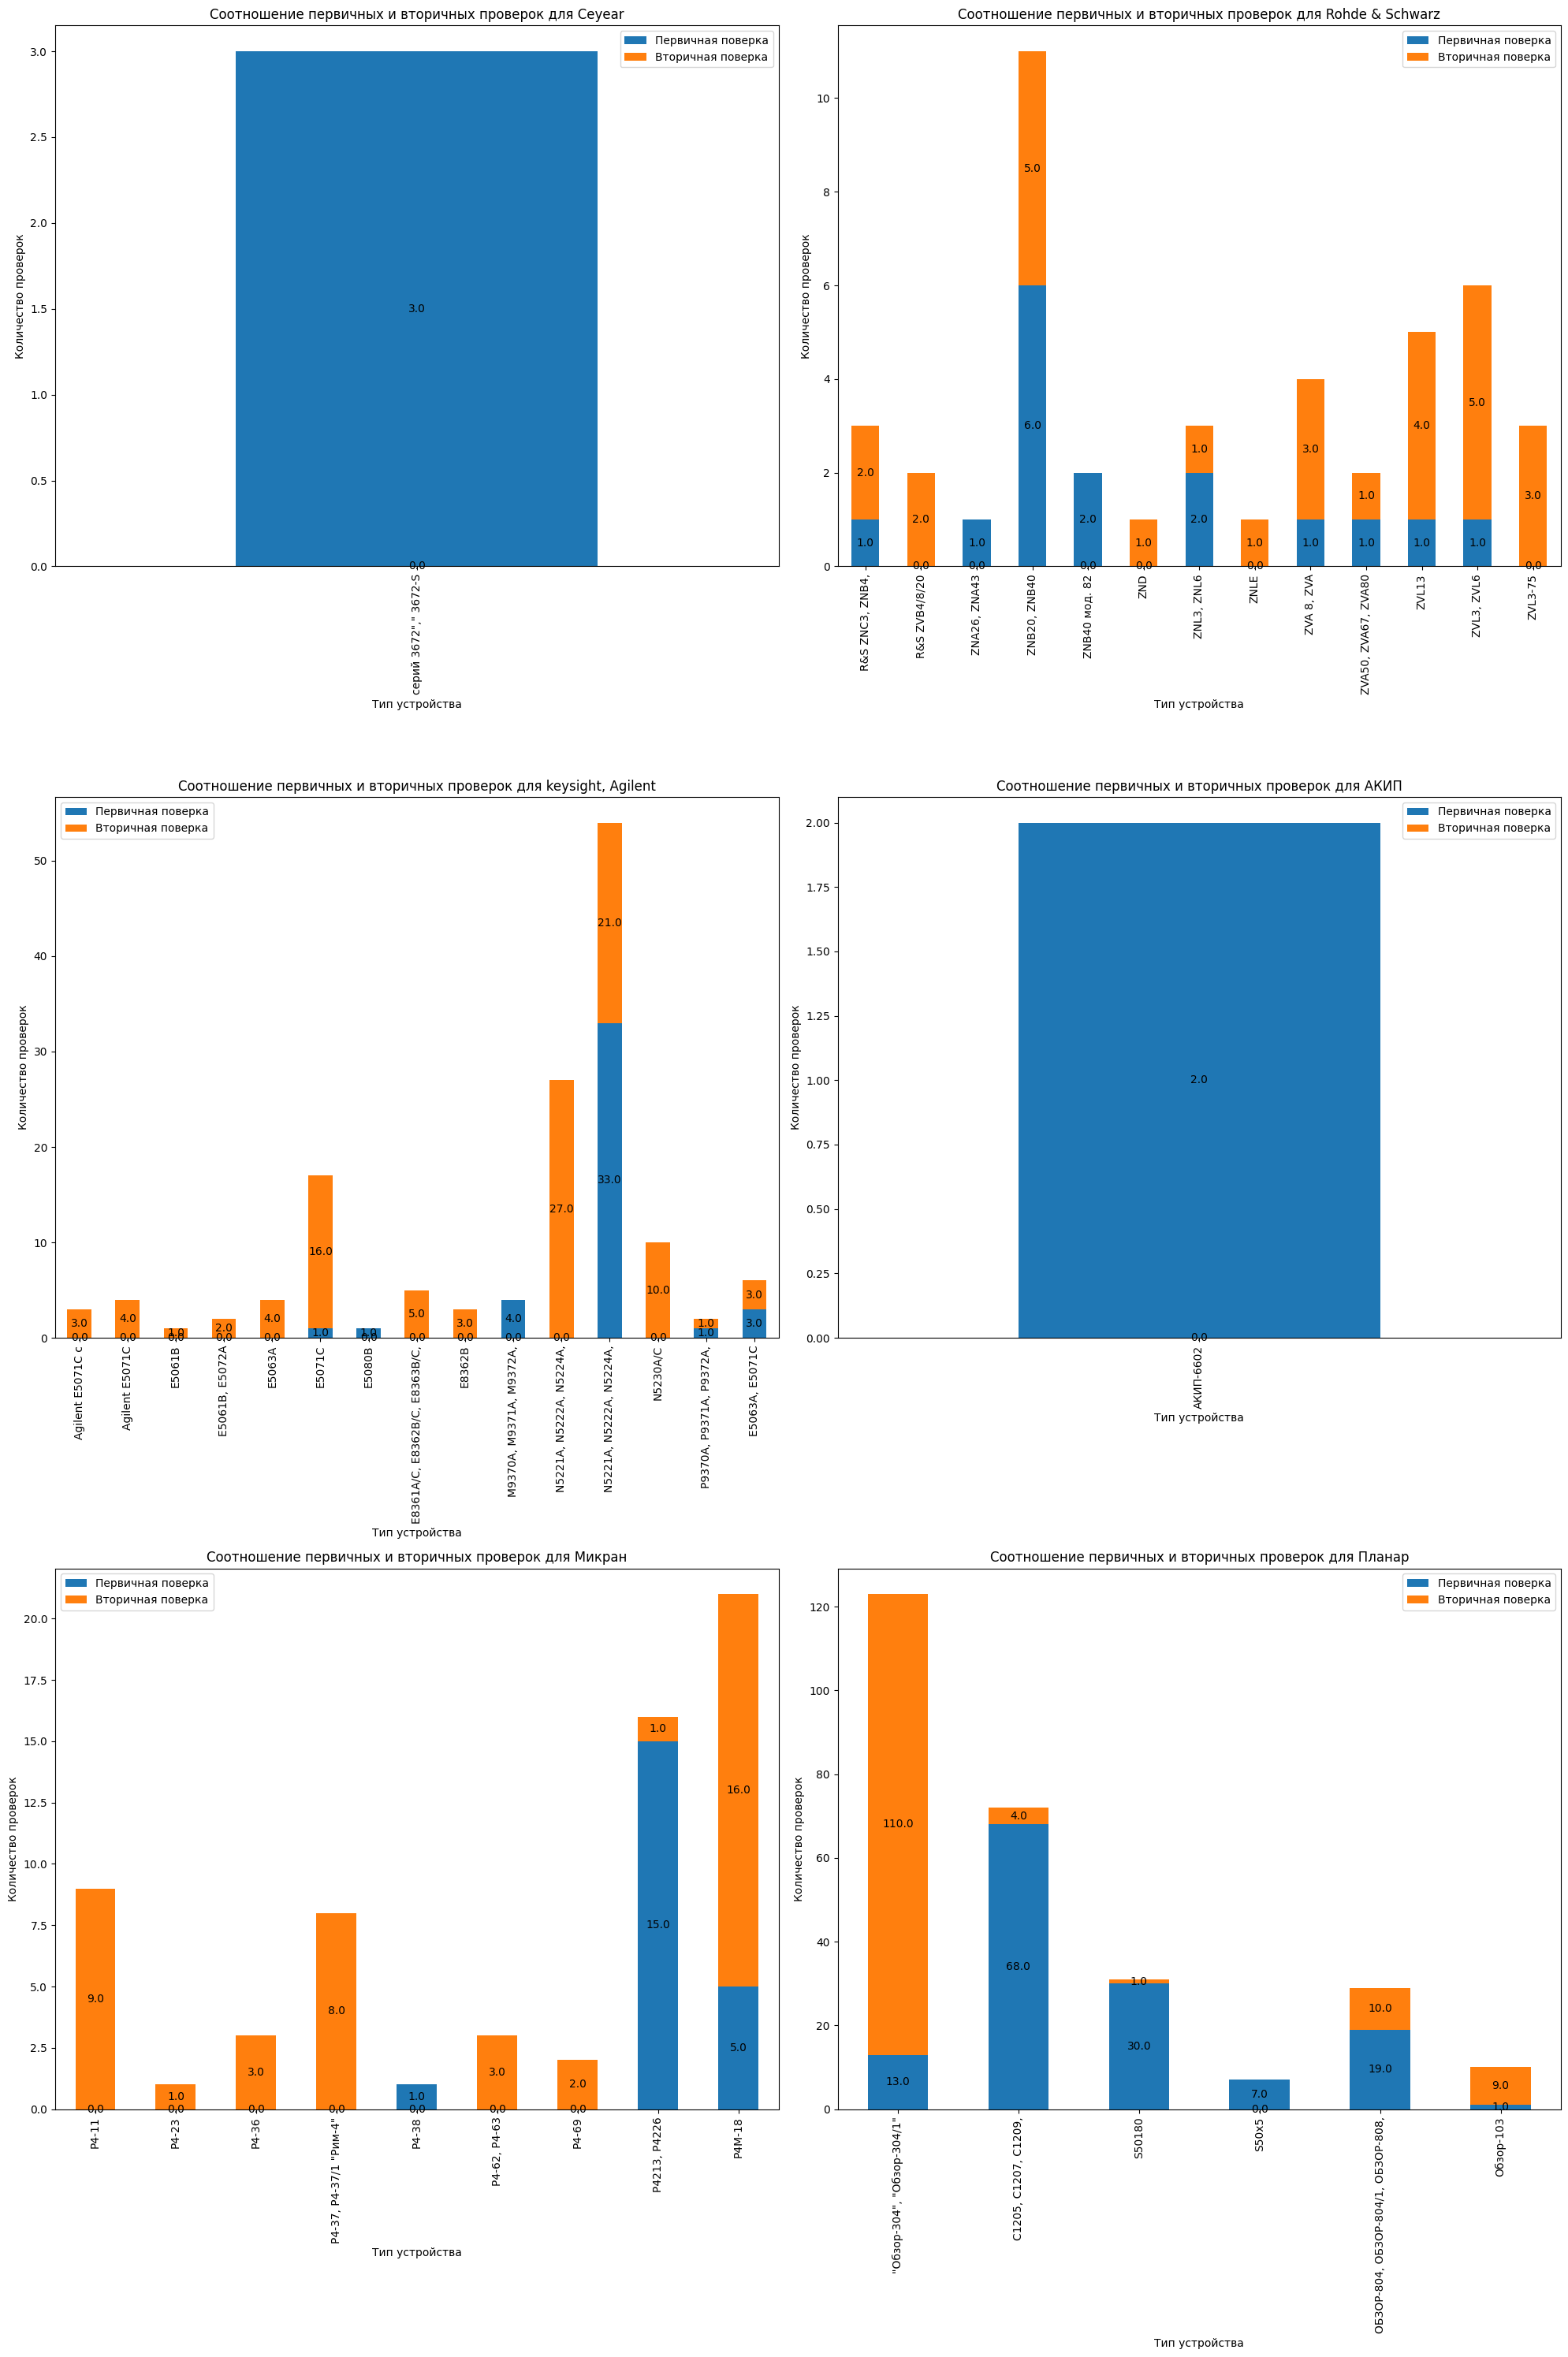

In [ ]:
import math

# Группируем данные по производителю, типу устройства и типу поверки
grouped_data = df_2022_nodub.groupby(['Manufacturer', 'mitypeType', 'vriType']).size().unstack(fill_value=0)

# Определяем количество графиков
num_manufacturers = len(grouped_data.index.get_level_values('Manufacturer').unique())
num_rows = math.ceil(num_manufacturers / 2)  # Количество строк в сетке

# Создаем сетку графиков
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 10 * num_rows))
axes = axes.flatten()  # Преобразуем массив осей в одномерный список

# Цикл по каждому производителю
i = 0
for manufacturer in grouped_data.index.get_level_values('Manufacturer').unique():
    # Фильтруем данные по текущему производителю
    manufacturer_data = grouped_data.loc[manufacturer]

    # Сокращаем названия mitypeType до трех слов
    manufacturer_data.index = manufacturer_data.index.map(lambda x: ' '.join(x.split()[:3]))

    # Строим столбчатую диаграмму
    bars = manufacturer_data.plot(kind='bar', ax=axes[i], stacked=True)

    # Настраиваем подписи осей
    axes[i].set_xlabel('Тип устройства')
    axes[i].set_ylabel('Количество проверок')
    axes[i].set_title(f'Соотношение первичных и вторичных проверок для {manufacturer}')

    # Легенда
    axes[i].legend(['Первичная поверка', 'Вторичная поверка'])

    # Добавляем подписи к столбцам по центру
    for bar in bars.containers:
        for rect in bar:
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x() + width / 2
            y = rect.get_y() + height / 2
            axes[i].annotate(f'{height}',
                        xy=(x, y),  # Координаты в центре столбца
                        ha='center', va='center')

    i += 1

# Настраиваем внешний вид сетки
plt.subplots_adjust(hspace=0.5)  # Увеличиваем вертикальное пространство между графиками
plt.tight_layout()

# Отображаем все графики
plt.show()

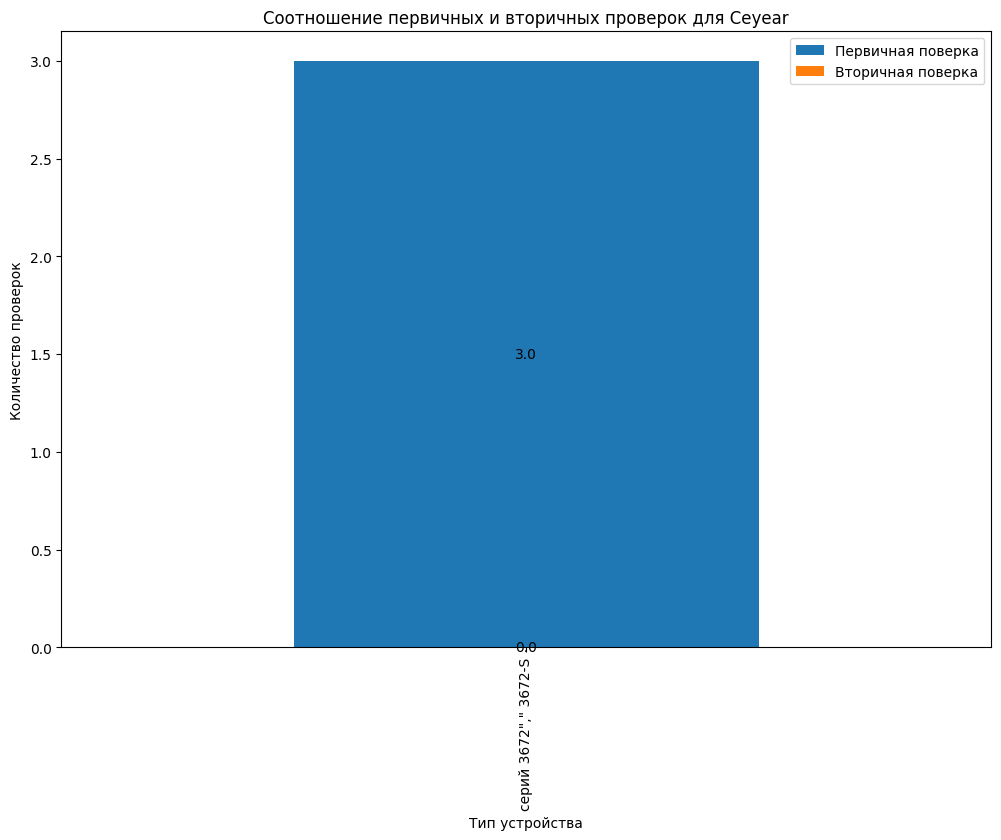

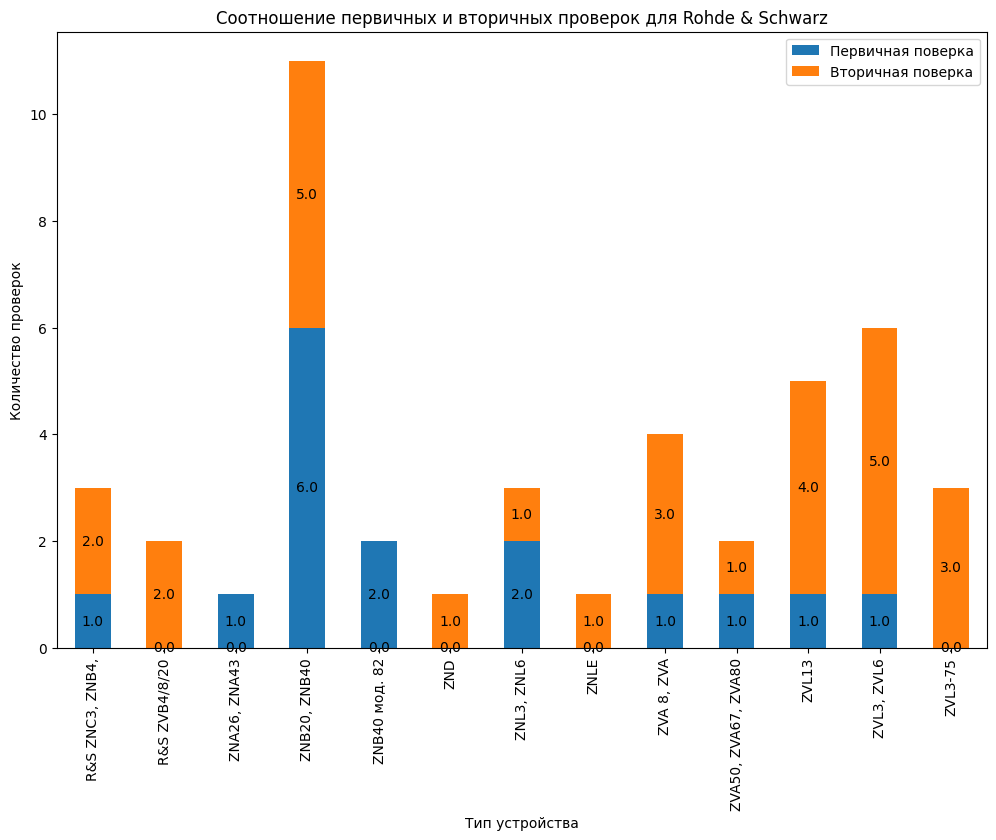

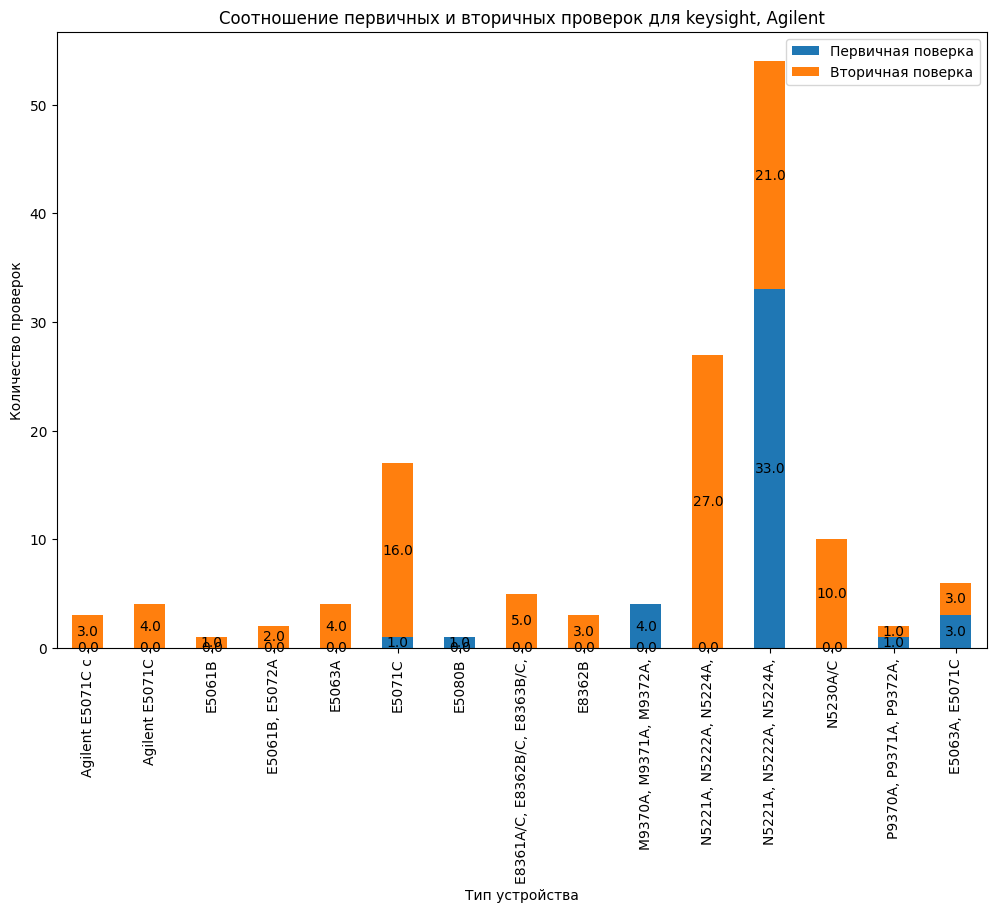

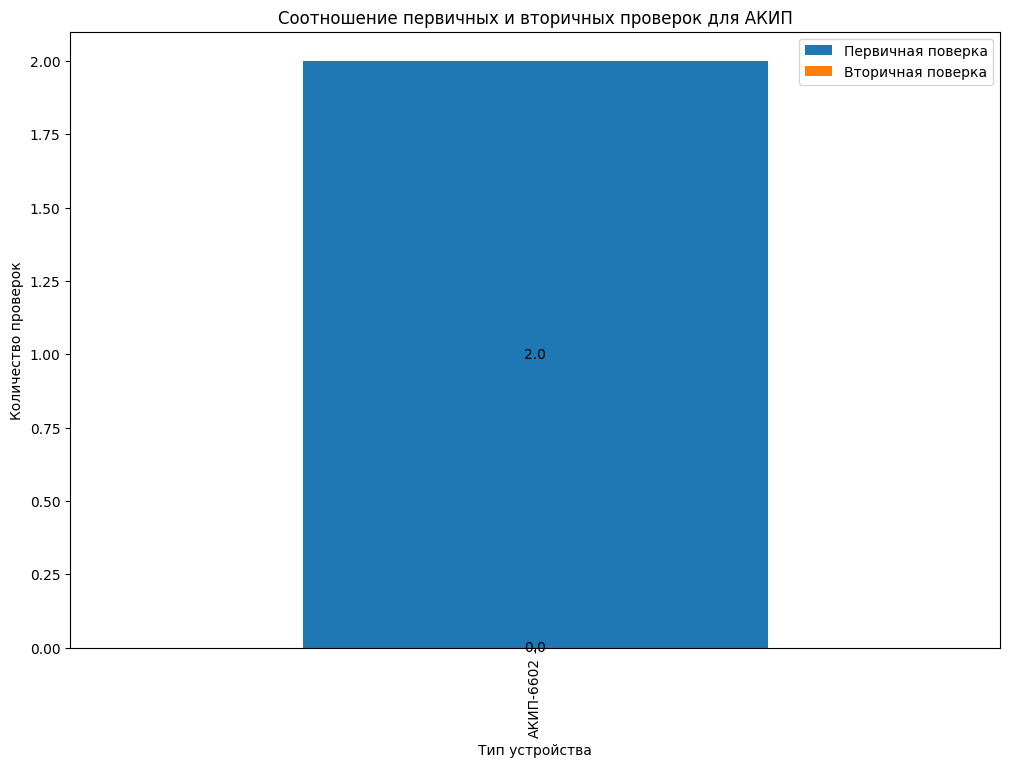

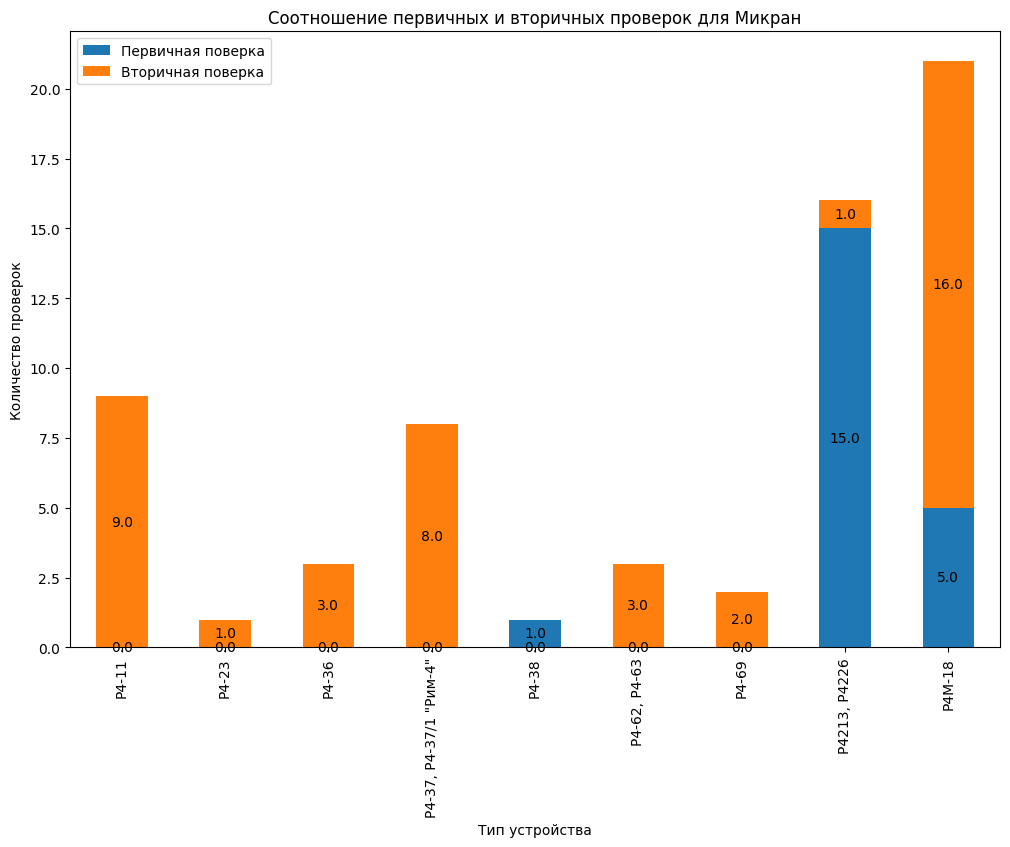

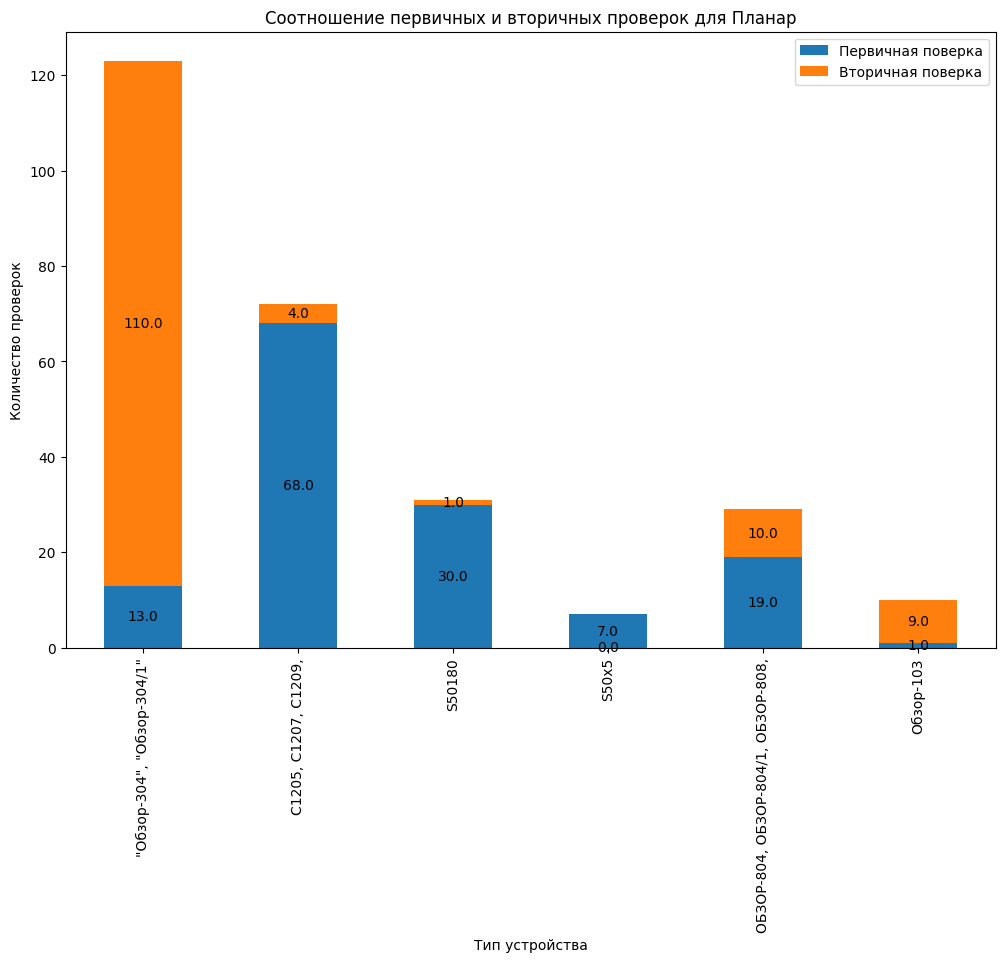

In [ ]:
grouped_data = df_2022_nodub.groupby(['Manufacturer', 'mitypeType', 'vriType']).size().unstack(fill_value=0)

# Цикл по каждому производителю
for manufacturer in grouped_data.index.get_level_values('Manufacturer').unique():
    # Фильтруем данные по текущему производителю
    manufacturer_data = grouped_data.loc[manufacturer]
    manufacturer_data.index = [' '.join(label.split()[:3]) for label in manufacturer_data.index.tolist()]

    # Создаем график
    fig, ax = plt.subplots(figsize=(12, 8))

    # Строим столбчатую диаграмму
    bars = manufacturer_data.plot(kind='bar', ax=ax, stacked=True)

    # Настраиваем подписи осей
    ax.set_xlabel('Тип устройства')
    ax.set_ylabel('Количество проверок')
    ax.set_title(f'Соотношение первичных и вторичных проверок для {manufacturer}')

    # Легенда
    ax.legend(['Первичная поверка', 'Вторичная поверка'])

    # Добавляем подписи к столбцам по центру
    for bar in bars.containers:
        for rect in bar:
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x() + width / 2
            y = rect.get_y() + height / 2
            ax.annotate(f'{height}',
                        xy=(x, y),  # Координаты в центре столбца
                        ha='center', va='center')

    # Отображаем график
    plt.show()

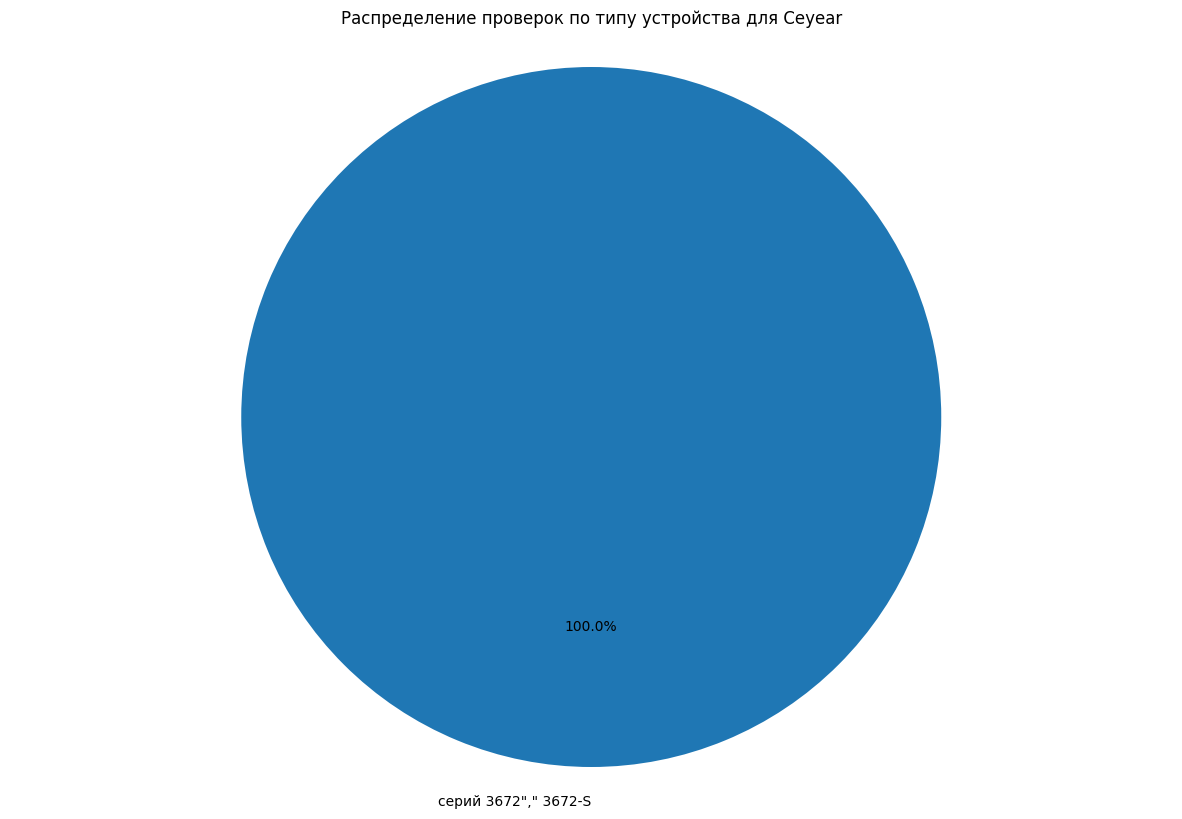

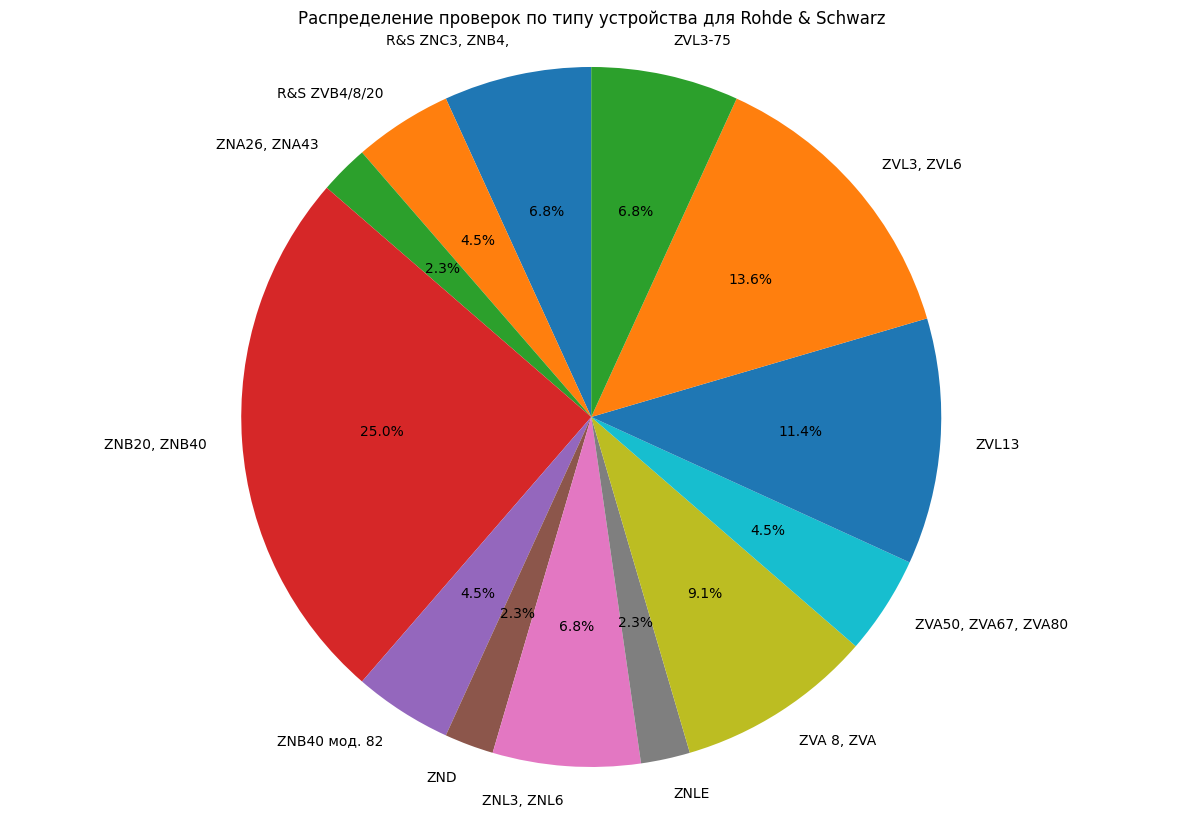

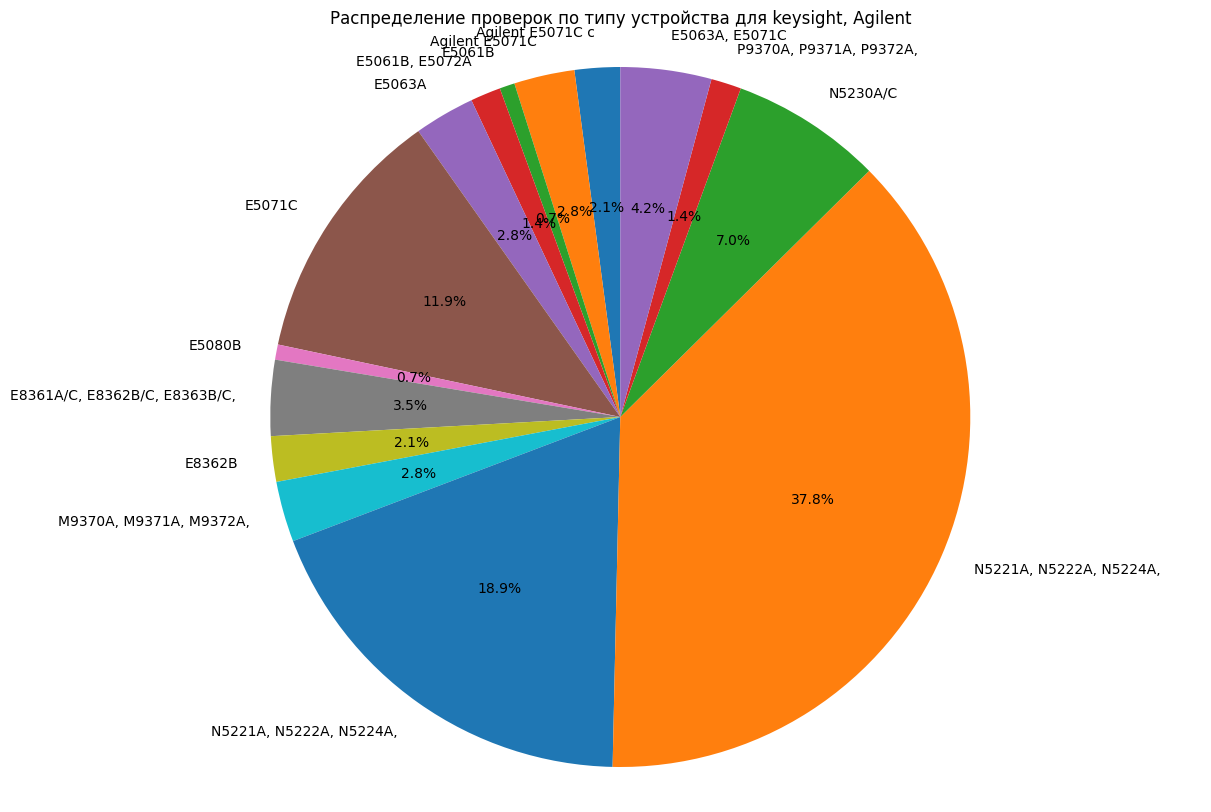

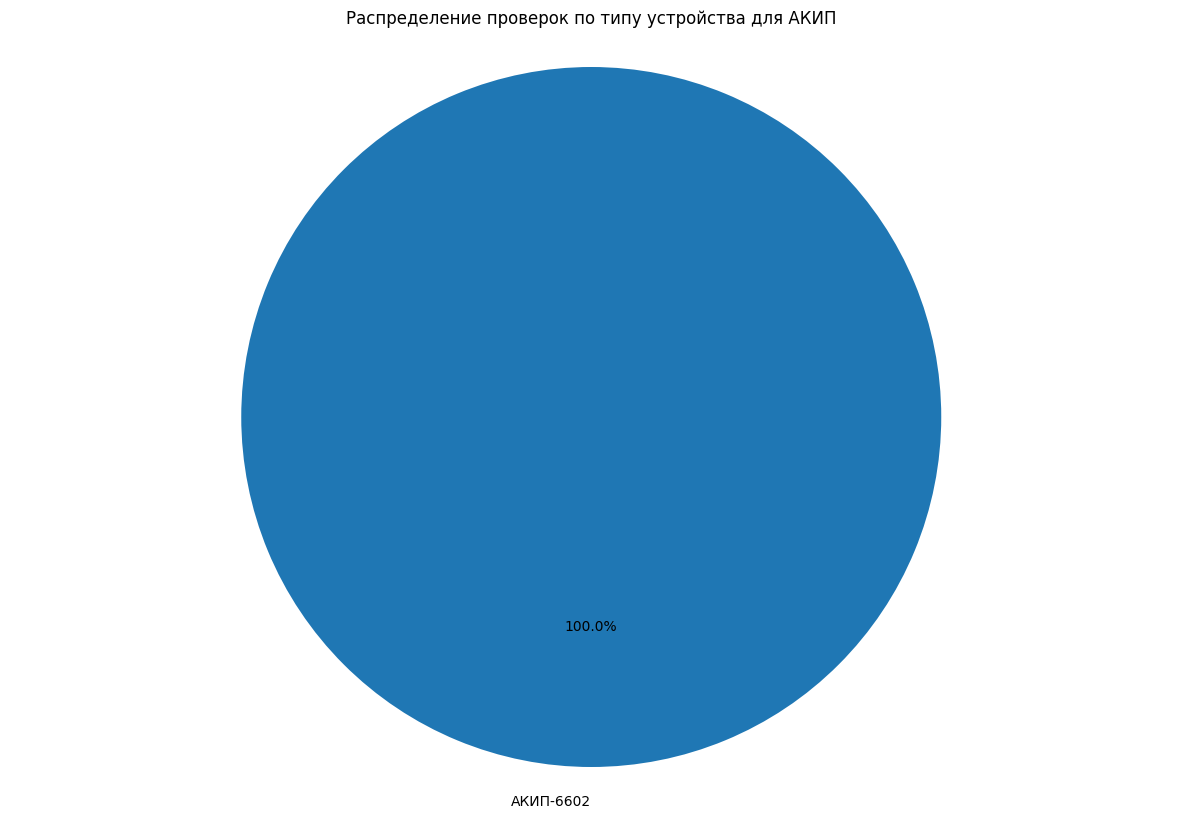

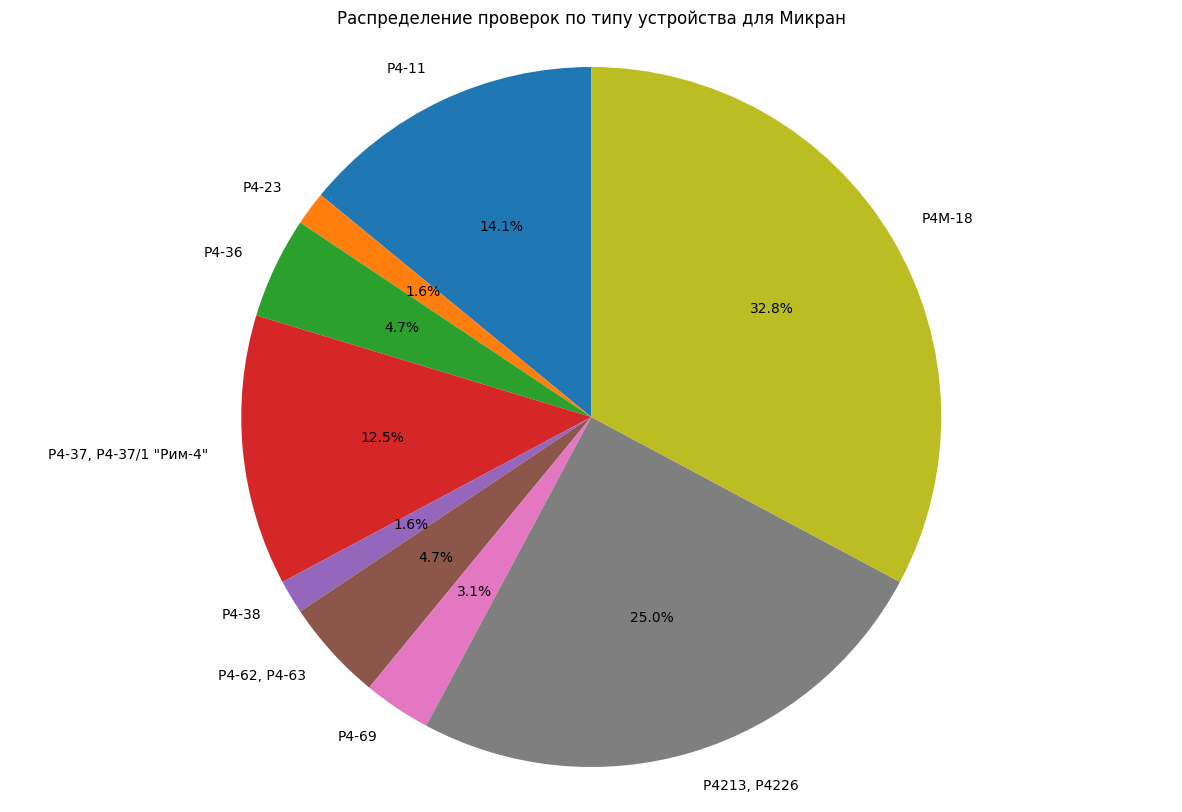

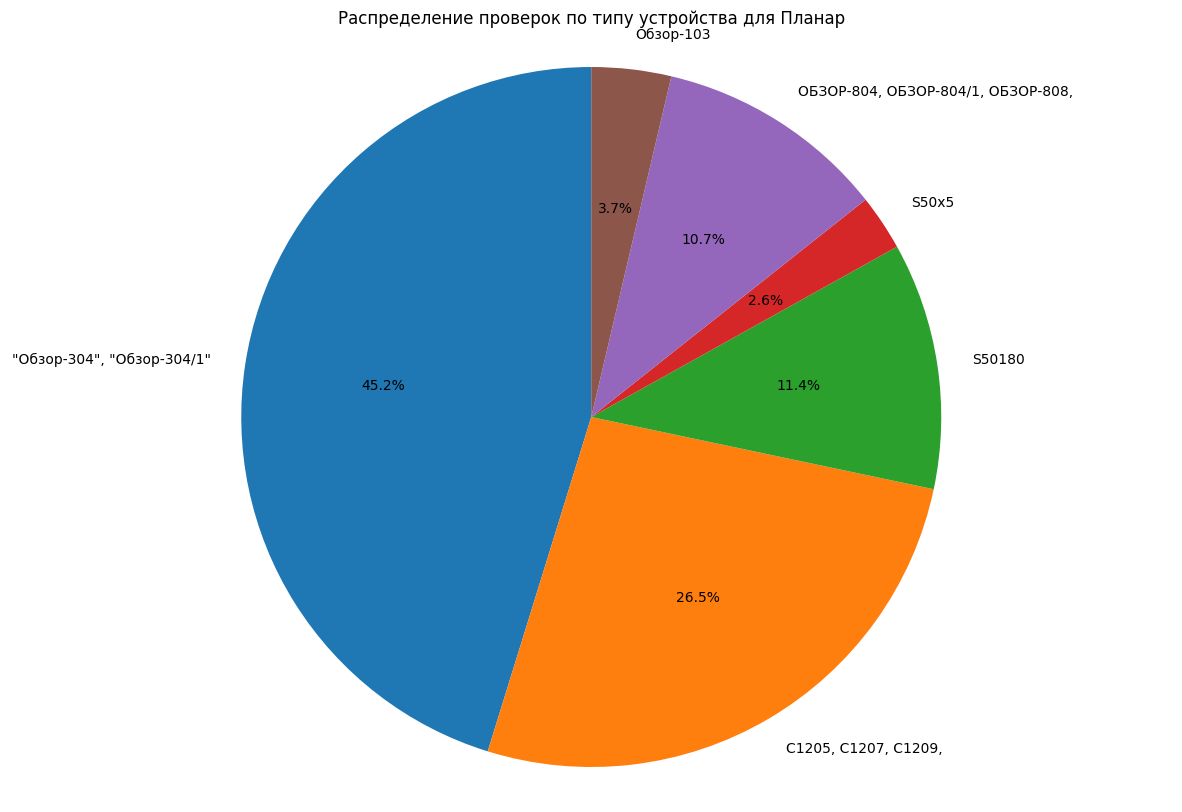

In [ ]:
# Группируем данные по производителю и типу устройства, игнорируя тип поверки
grouped_data = df_2022_nodub.groupby(['Manufacturer', 'mitypeType']).size()

# Цикл по каждому производителю
for manufacturer in grouped_data.index.get_level_values('Manufacturer').unique():
    # Фильтруем данные по текущему производителю
    manufacturer_data = grouped_data.loc[manufacturer]
    manufacturer_data.index = [' '.join(label.split()[:3]) for label in manufacturer_data.index.tolist()]

    # Создаем круговую диаграмму
    fig, ax = plt.subplots(figsize=(15, 10))  # Увеличим размер фигуры для круговой диаграммы

    # Вычисляем доли
    sizes = manufacturer_data.values
    labels = manufacturer_data.index

    # Строим круговую диаграмму
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    # Настраиваем внешний вид
    ax.axis('equal')  # Делаем круг
    plt.title(f'Распределение проверок по типу устройства для {manufacturer}')

    # Отображаем график
    plt.show()

# **5. Парк приборов по производителям**

In [ ]:
un = (pd.unique(df['mitypeType'].astype(str)))
for i in un:
  print(i)

MS46122B, MS46322B, MS46522B, MS46524B
MS46122A, MS46322A
Р4М-18
C1205, C1207, С1209, С1214, С1220, С1409, С1420, С2209, С2409, С2220, С2420, С4209, С4409, С4220, С4420
R&S ZNC3, ZNB4, ZNB8
Р4213, Р4226
ZVA 8, ZVA 24, ZVA 40
N5221A, N5222A, N5224A, N5225A, N5227A, N5231A, N5232A, N5234A, N5235A, N5239A, N5241А, N5242А, N5244A, N5245А, N5247A
E5061B, E5072A
R&S ZVB 4/8/14/20
E8361A/C, E8362B/C, E8363B/C, E8364B/C
Agilent E5071C с опциями 2К5, 4К5, 260, 460, 465, 2D5, 4D5
ZVL13
E5071C
Е5063А, E5071C
АКИП-6602
Agilent Е5071С
ZVL3, ZVL6
АКИП-6604
S50x4x
N5249A, N5249B
N5242A
E5080B
ZVL3-75
S50180
S50x5
N5230A/C
N5221A, N5222A, N5224A, N5225A, N5227A, N5231A, N5232A, N5234A, N5235A, N5239A, N5241А, N5242А, N5244A, N5245А, N5247A, N5221B, N5222B, N5224B, N5225B, N5227B, N5231B, N5232B, N5234B, N5235B, N5239B, N5241B, N5242B, N5244B, N5245B, N5247B
ZNB20, ZNB40
ZNB40 мод. 82 и 84
ZNA26, ZNA43
E5061B
ZND
P9370А, P9371А, P9372А, P9373А, P9374А, P9375А, P5000A, P5020A, P5001A, P5021A, P5002A, P5

новый df, специально для этих графиков

In [ ]:
df_duration = df_2022_nodub[df_2022_nodub['Duration'] != 0]

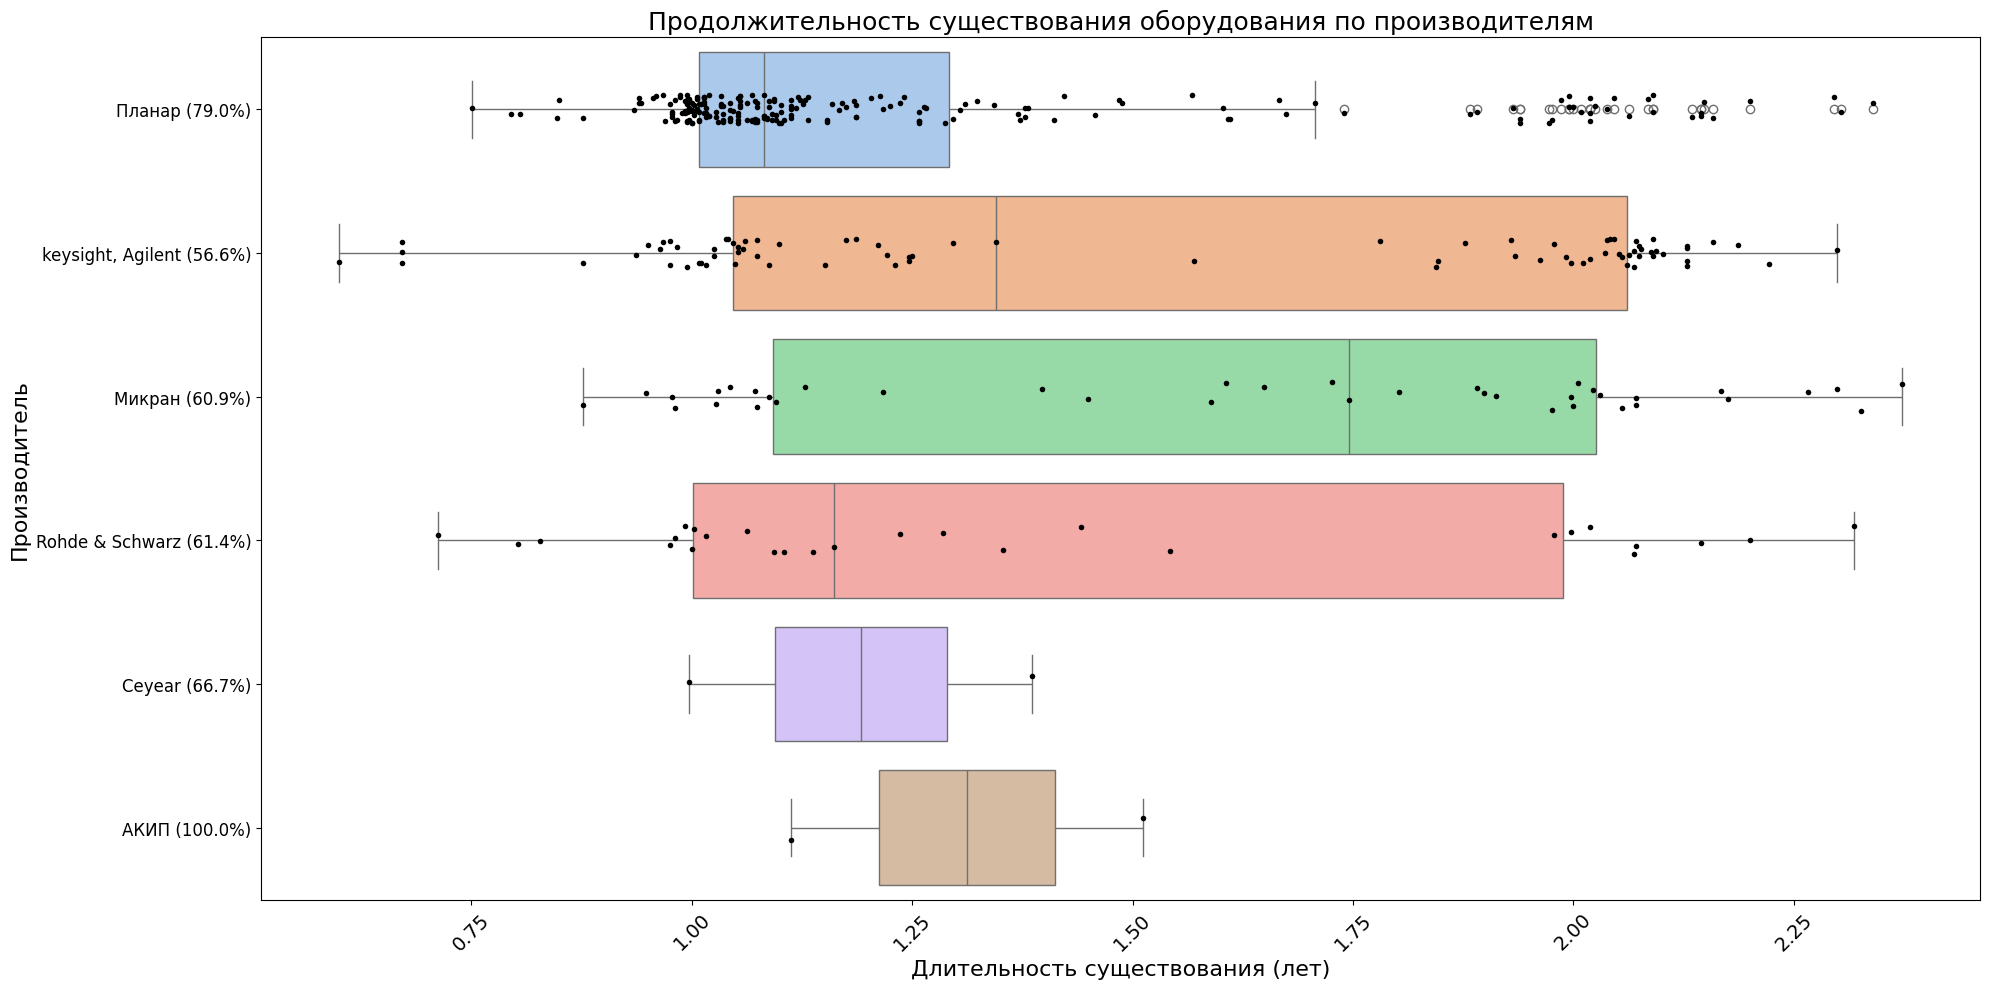

In [ ]:

df_duration = df_duration.dropna(subset=['Manufacturer'])
df_2021_nodub = df_2022_nodub.dropna(subset=['Manufacturer'])

# Преобразуем Duration из дней в годы
df_duration['Duration'] = df_duration['Duration'] / 365

# Строим комбинированную диаграмму с boxplot и stripplot
plt.figure(figsize=(20, 10))  # Устанавливаем размер диаграммы

# Создаем оси
ax = sns.boxplot(
    x='Duration',
    y='Manufacturer',
    data=df_duration,
    orient='h',  # Делаем boxplot горизонтальным
    linewidth=1,  # Устанавливаем толщину линии для boxplot
    palette="pastel",  # Используем пастельную цветовую палитру
    hue='Manufacturer',  # Добавляем hue для устранения предупреждения
    legend=False
)

# Stripplot для отображения отдельных точек
sns.stripplot(
    x='Duration',
    y='Manufacturer',
    data=df_duration,
    orient='h',  # Делаем stripplot горизонтальным
    color='black',  # Устанавливаем цвет точек
    size=4  # Устанавливаем размер точек
)

# Настраиваем оси и заголовок диаграммы
plt.xlabel('Длительность существования (лет)', fontsize=16)  # Устанавливаем размер шрифта для подписи оси X
plt.ylabel('Производитель', fontsize=16)  # Устанавливаем размер шрифта для подписи оси Y
plt.title('Продолжительность существования оборудования по производителям', fontsize=18)  # Устанавливаем размер шрифта для заголовка
plt.xticks(rotation=45, fontsize=14)  # Поворачиваем подписи на оси X на 45 градусов и устанавливаем размер шрифта

# Добавляем проценты приборов для каждого производителя
yticks = []
yticklabels = []
for i, manufacturer in enumerate(df_duration['Manufacturer'].unique()):
    # Получаем процент для данного производителя
    total_count = df_2021_nodub['Manufacturer'].value_counts().get(manufacturer, 0)
    duration_count = df_duration['Manufacturer'].value_counts().get(manufacturer, 0)
    percentage = (duration_count / total_count) * 100 if total_count != 0 else 0

    # Добавляем проценты в обозначения производителей
    yticks.append(i)
    yticklabels.append(f"{manufacturer} ({percentage:.1f}%)")

# Устанавливаем новые обозначения для оси Y
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=12)

plt.tight_layout()
plt.show()

# **6. Заказчики с максимальным числом вторичных поверок**

In [ ]:
top_customers = df_2022_nodub.groupby('miOwner')['vriType'].apply(lambda x: (x == 2.0).sum()).nlargest(10).index.tolist()

# Группируем данные по компаниям и типу поверки
grouped_data = df_2022_nodub[df_2022_nodub['miOwner'].isin(top_customers)].groupby(['miOwner', 'vriType']).size().unstack(fill_value=0)
print(grouped_data)
# Переименовываем столбцы для удобства
grouped_data.columns = ['Primary_Verifications', 'Secondary_Verifications']

# Сортируем по количеству вторичных поверок в порядке убывания
grouped_data = grouped_data.sort_values(by='Secondary_Verifications', ascending=False)

# Выводим результат
print(grouped_data)

vriType                  1.0  2.0
miOwner                          
Неизвестный владелец СИ   90  121
мз рип                     0    7
нител                      0    5
нпп исток им шокина        3   32
нпп истоким шокина         0    5
нпп салют                  0    5
нпп фаза                   0    7
окбпланета                 0   10
умз                        0    7
ярославский радиозавод     0    6
                         Primary_Verifications  Secondary_Verifications
miOwner                                                                
Неизвестный владелец СИ                     90                      121
нпп исток им шокина                          3                       32
окбпланета                                   0                       10
мз рип                                       0                        7
нпп фаза                                     0                        7
умз                                          0                        7
ярославский ради

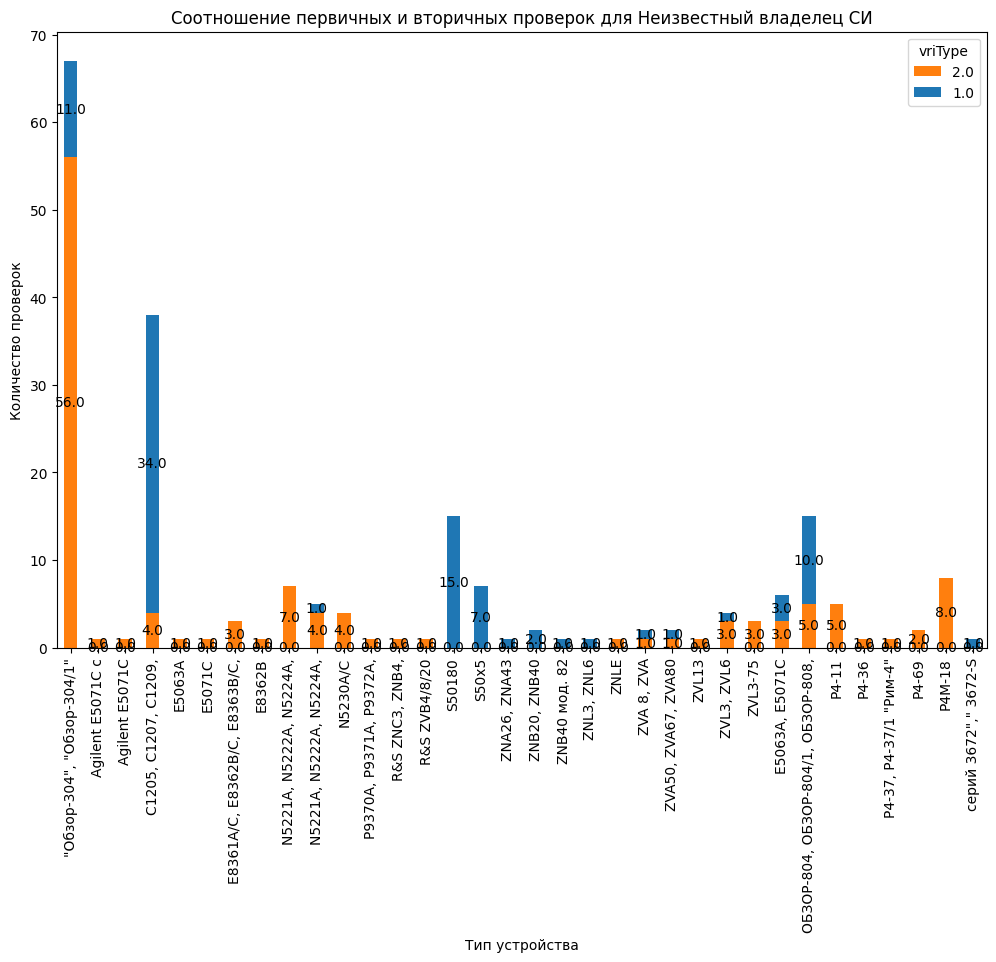

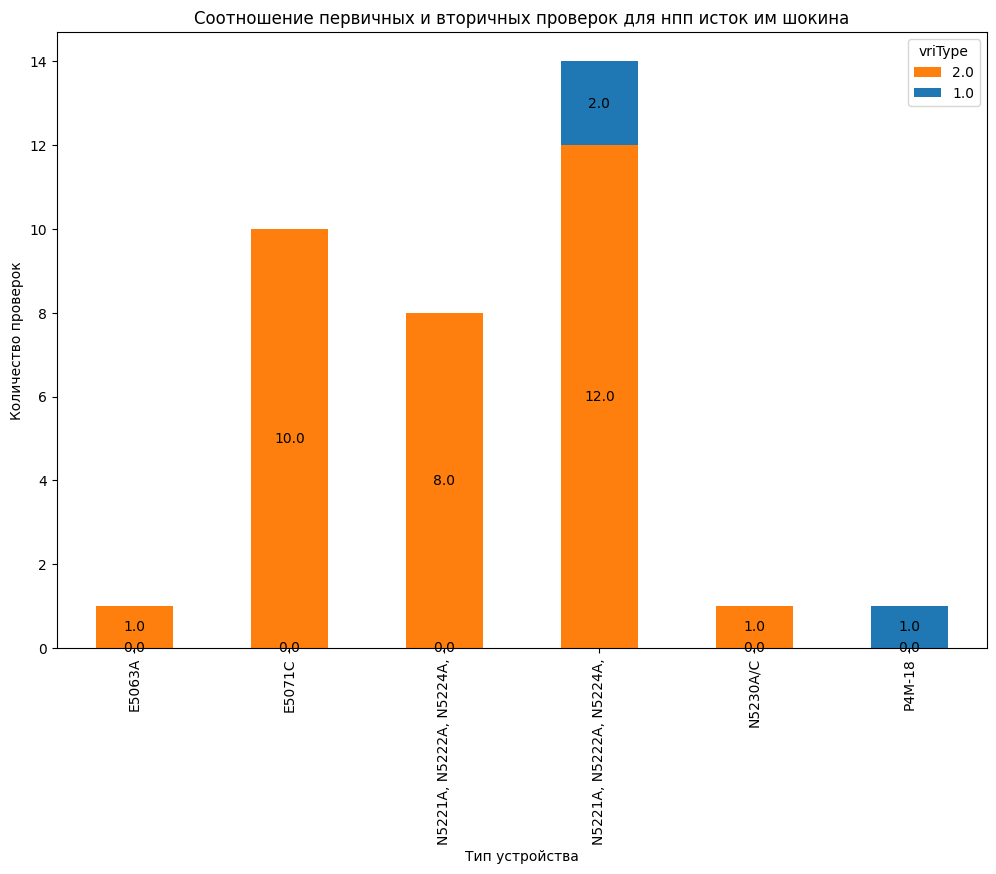

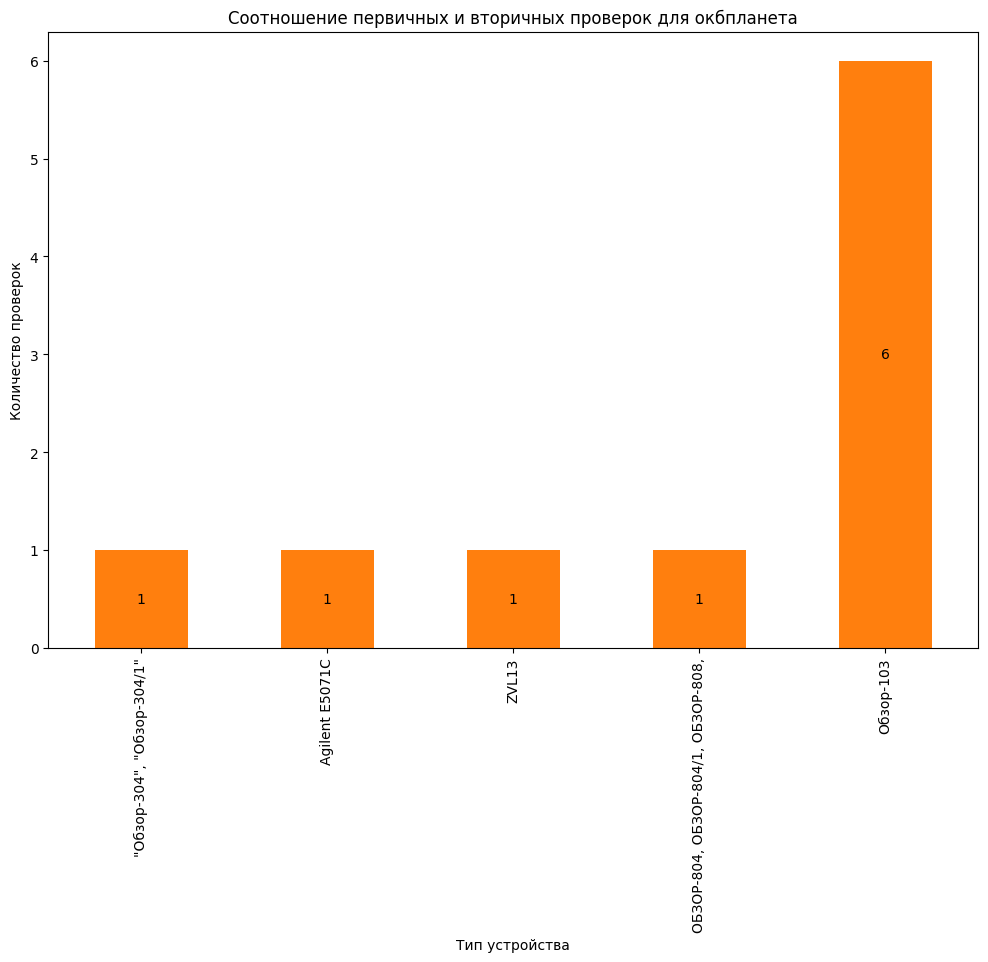

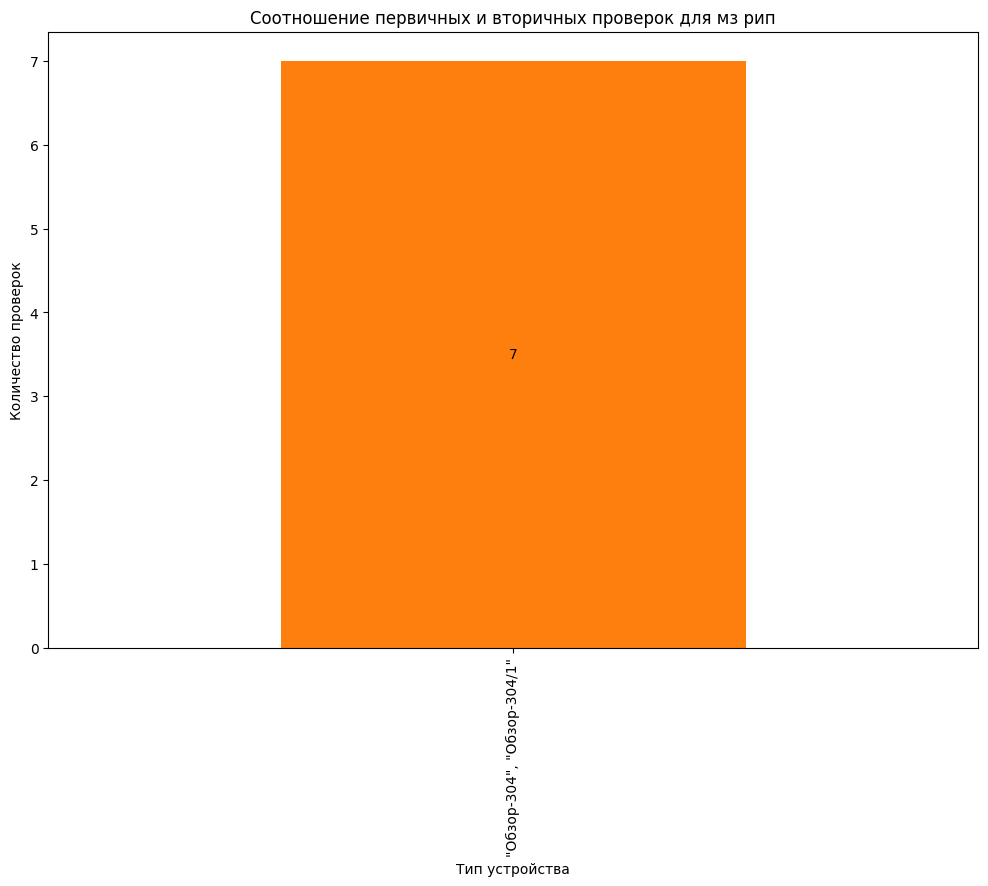

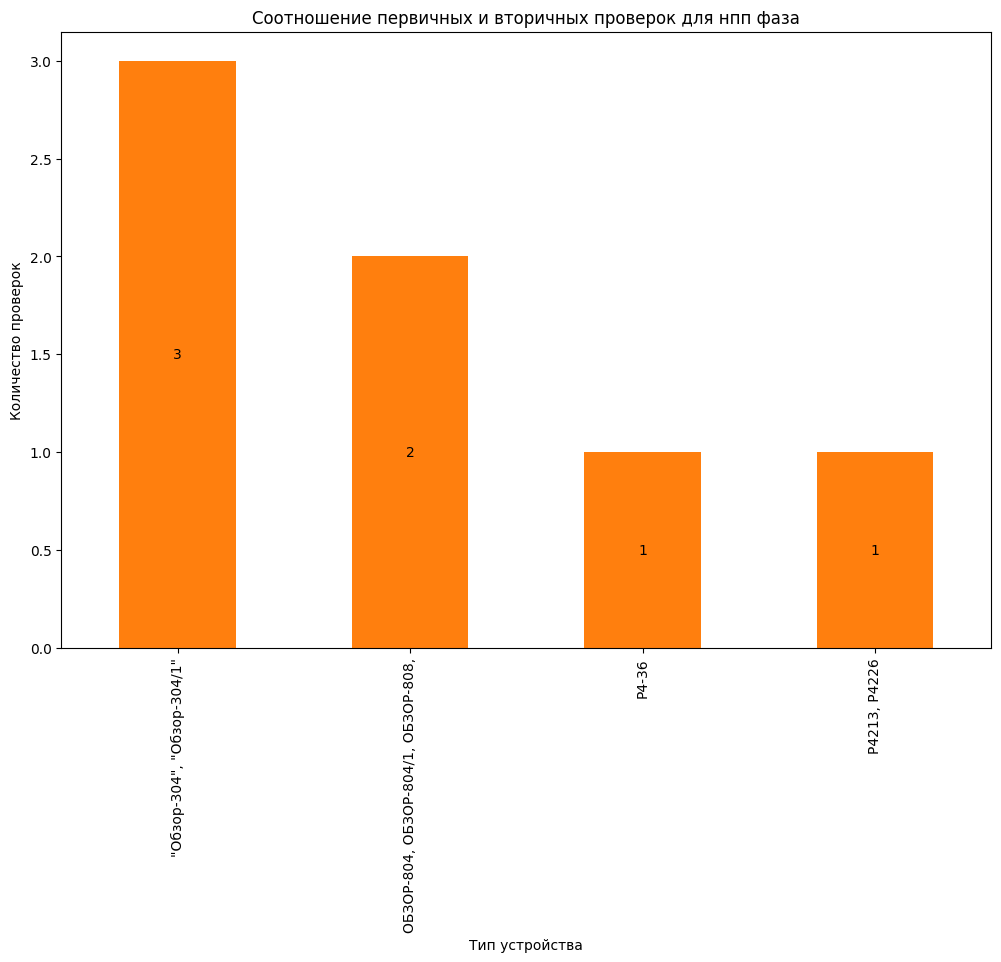

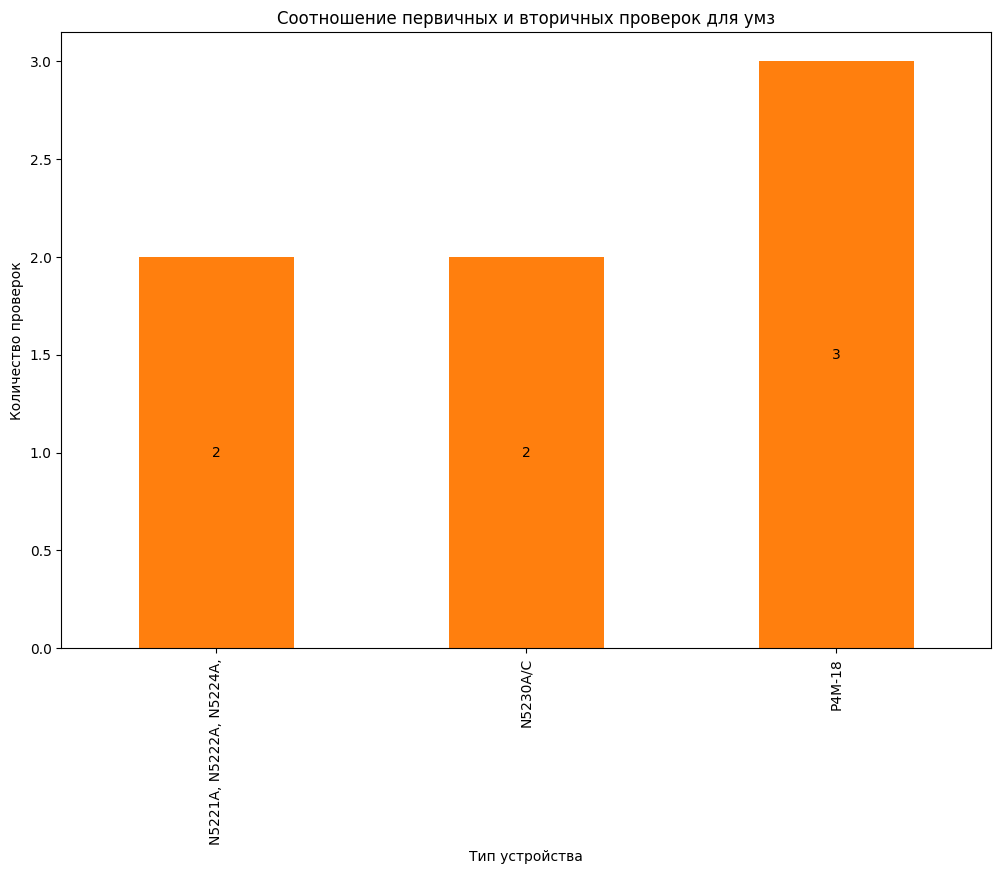

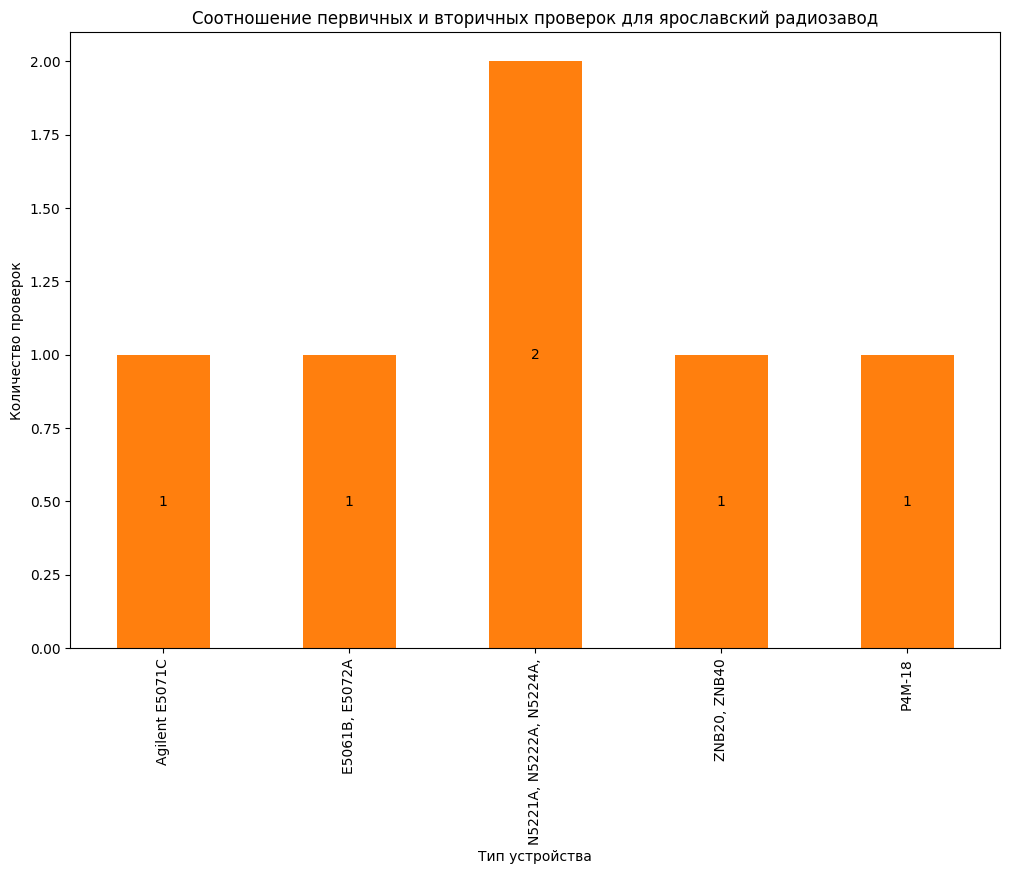

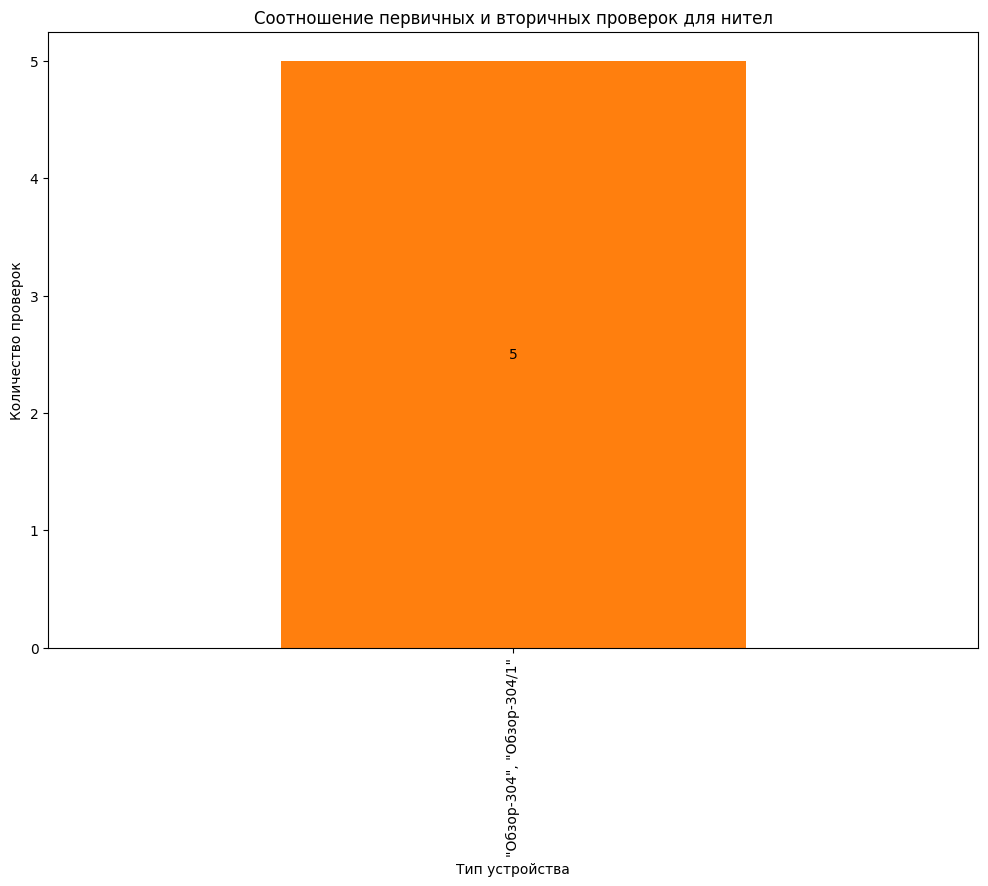

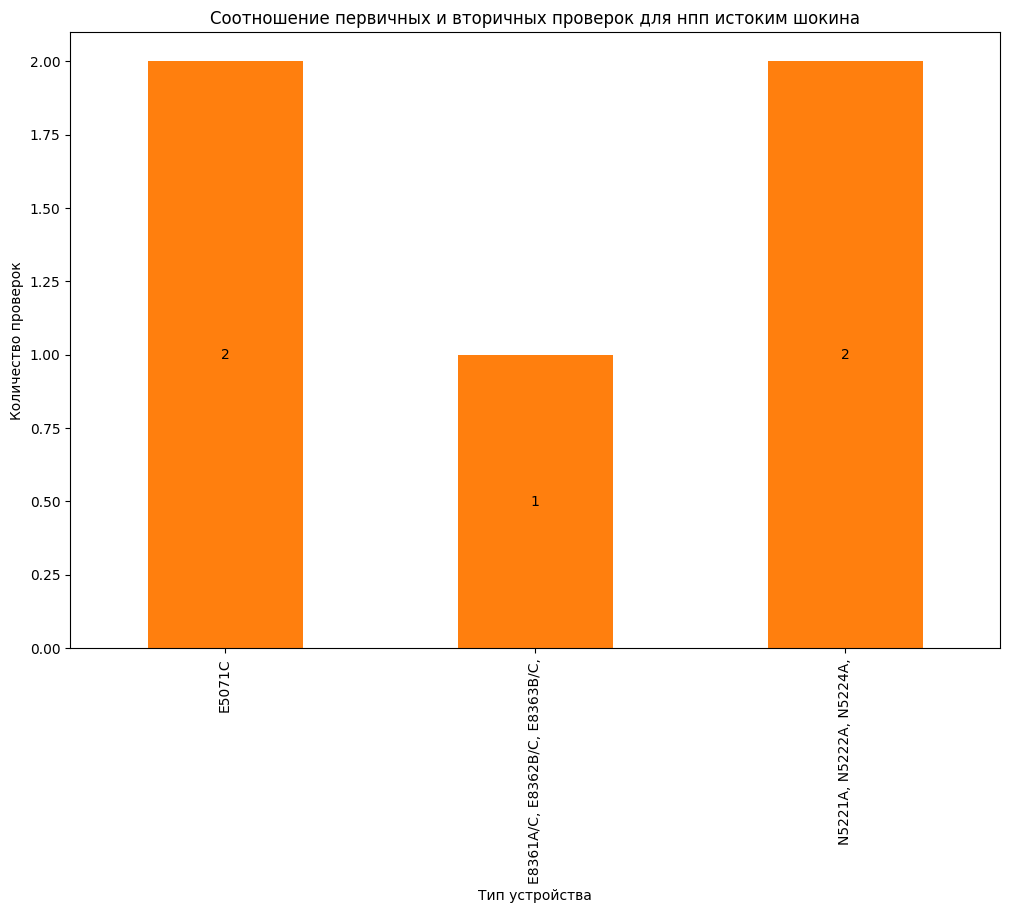

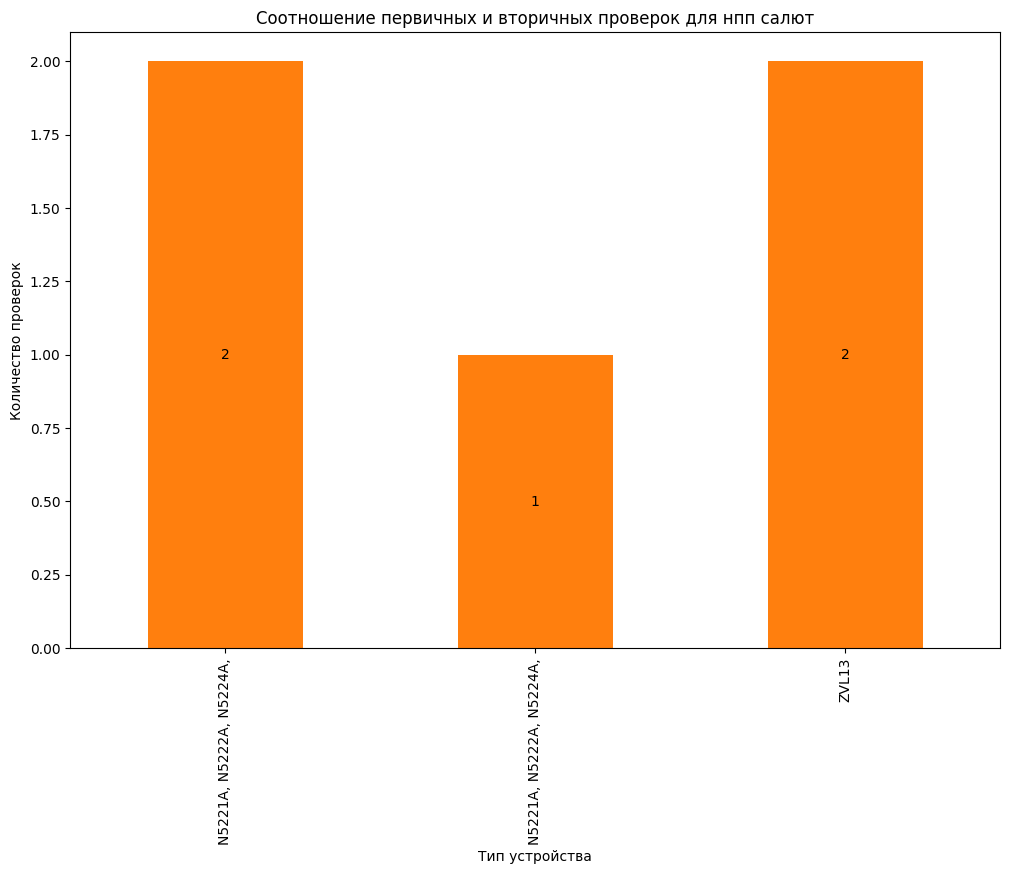

In [ ]:

# Находим топ 10 компаний с наибольшим числом повторных проверок
top_customers = df_2022_nodub[df_2022_nodub['vriType'] == 2.0].groupby('miOwner').size().nlargest(10).index.tolist()

# Группируем данные по компаниям и типу поверки
grouped_data = df_2022_nodub[df_2022_nodub['miOwner'].isin(top_customers)].groupby(['miOwner', 'vriType']).size().unstack(fill_value=0)

# Цикл по всем компаниям
for company in top_customers:
    try:
        # Фильтруем DataFrame по компании
        df_company = df_2022_nodub[df_2022_nodub['miOwner'] == company]

        # Группируем данные по типу устройства и типу поверки
        grouped = df_company.groupby(['mitypeType', 'vriType']).size().unstack(fill_value=0)

        # Проверяем, есть ли первичные поверки у компании
        if 1.0 in grouped.columns:  # <--- Изменение здесь
            grouped = grouped[[2.0, 1.0]]
            # Строим график с первичными и вторичными проверками
            fig, ax = plt.subplots(figsize=(12, 8))
            grouped.plot(kind='bar', ax=ax, stacked=True, color=['#FF7F0E', '#1F77B4'])

            # Добавляем подписи с числами на столбцы
            for p in ax.patches:
                width, height = p.get_width(), p.get_height()
                x, y = p.get_xy()
                ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center')  # <--- Изменение здесь

            # Сокращаем названия типов устройств до 3 слов и выводим строкой
            ax.set_xticklabels([' '.join(label.split()[:3]) for label in grouped.index.tolist()])  # <--- Изменение здесь
        else:
            # Строим график только со вторичными проверками
            fig, ax = plt.subplots(figsize=(12, 8))
            grouped[2.0].plot(kind='bar', ax=ax, color='#FF7F0E')

            # Добавляем подписи с числами на столбцы
            for p in ax.patches:
                width, height = p.get_width(), p.get_height()
                x, y = p.get_xy()
                ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center')  # <--- Изменение здесь

            # Сокращаем названия типов устройств до 3 слов и выводим строкой
            ax.set_xticklabels([' '.join(label.split()[:3]) for label in grouped.index.tolist()])  # <--- Изменение здесь

        # Настраиваем подписи осей
        ax.set_xlabel('Тип устройства')
        ax.set_ylabel('Количество проверок')
        ax.set_title(f'Соотношение первичных и вторичных проверок для {company}')

        # Отображаем график
        plt.show()

    except Exception as e:
        print(f"Ошибка при обработке компании {company}: {e}")

In [ ]:
for i, company in enumerate(top_customers):
    try:
        # Фильтруем DataFrame по компании
        df_company = df_2021_nodub[df_2021_nodub['miOwner'] == company]

        # Группируем данные по типу устройства
        grouped = df_company.groupby('mitypeType').size()

        # Сокращаем названия устройств до 5 слов
        labels = [" ".join(label.split()[:3]) for label in grouped.index.tolist()]

        # Строим круговую диаграмму
        fig, ax = plt.subplots(figsize=(20, 10))
        wedges, texts, autotexts = ax.pie(grouped, labels=labels, autopct='%1.1f%%', startangle=90)

        # Сокращаем названия компаний до 5 слов
        company_short = " ".join(company.split()[:6])

        # Настраиваем подписи осей
        ax.set_title(f'Распределение проверок по типам устройств для {company_short}')

        # Легенда (изменение здесь)
        plt.legend(title='Типы устройств', loc='lower left', bbox_to_anchor=(1.0, 0.5), prop={'size': 8})
        # bbox_to_anchor - смещает легенду на 1 вправо относительно графика
        # loc - позиция легенды
        # prop - размер шрифта в легенде

        # Отображаем график
        plt.show()

        # Добавляем отступ между графиками
        if i < len(top_customers) - 1:
            plt.figure()
            plt.tight_layout()

    except:
        print(company)

Неизвестный владелец СИ
нпп исток им шокина
окбпланета
мз рип
нпп фаза
умз
ярославский радиозавод
нител
нпп истоким шокина
нпп салют
